<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/Association_Rules_%E0%B9%81%E0%B8%81%E0%B9%89%E0%B8%A5%E0%B9%88%E0%B8%B2%E0%B8%AA%E0%B8%B8%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [3]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_excel('/content/drive/My Drive/Paper/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_1', usecols=lambda x: 'Unnamed' not in x)
data

,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,Temp,Globe temp,RH,V,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,ชาย,27,49,169,17.156262,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,ชาย,36,71,175,23.183673,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,หญิง,25,89,153,38.019565,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,ชาย,29,75,165,27.548209,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,ชาย,28,118,187,33.744173,ภายนอก/ มีหลังคาคลุม,30.5,30.6,42.9,0.13,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,ชาย,37,88,180,27.160494,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,หญิง,23,47,159,18.591037,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,ชาย,27,47,169,16.456006,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,ชาย,57,68,171,23.255019,ภายใต้อาคาร,35.6,36.2,46.5,0.40,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer


#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [ ]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [ ]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [ ]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [ ]:
data.BMI.fillna(BMI1, inplace=True)

##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7810f0b9c430>,
 'caps': [<matplotlib.lines.Line2D at 0x7810f0b9ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810f0b9c130>],
 'medians': [<matplotlib.lines.Line2D at 0x7810f0b9d960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810f0b9d660>],
 'means': []}

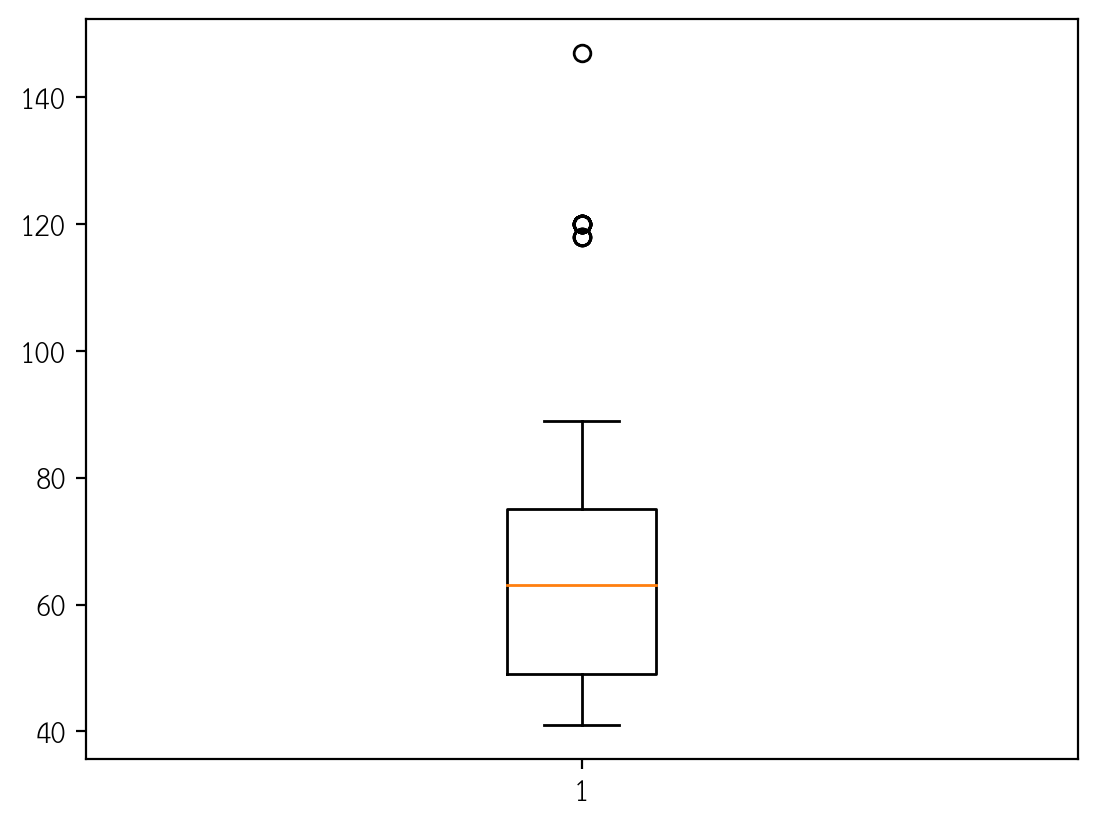

In [ ]:
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eead41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eead4700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeaa7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eead4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eead4ee0>],
 'means': []}

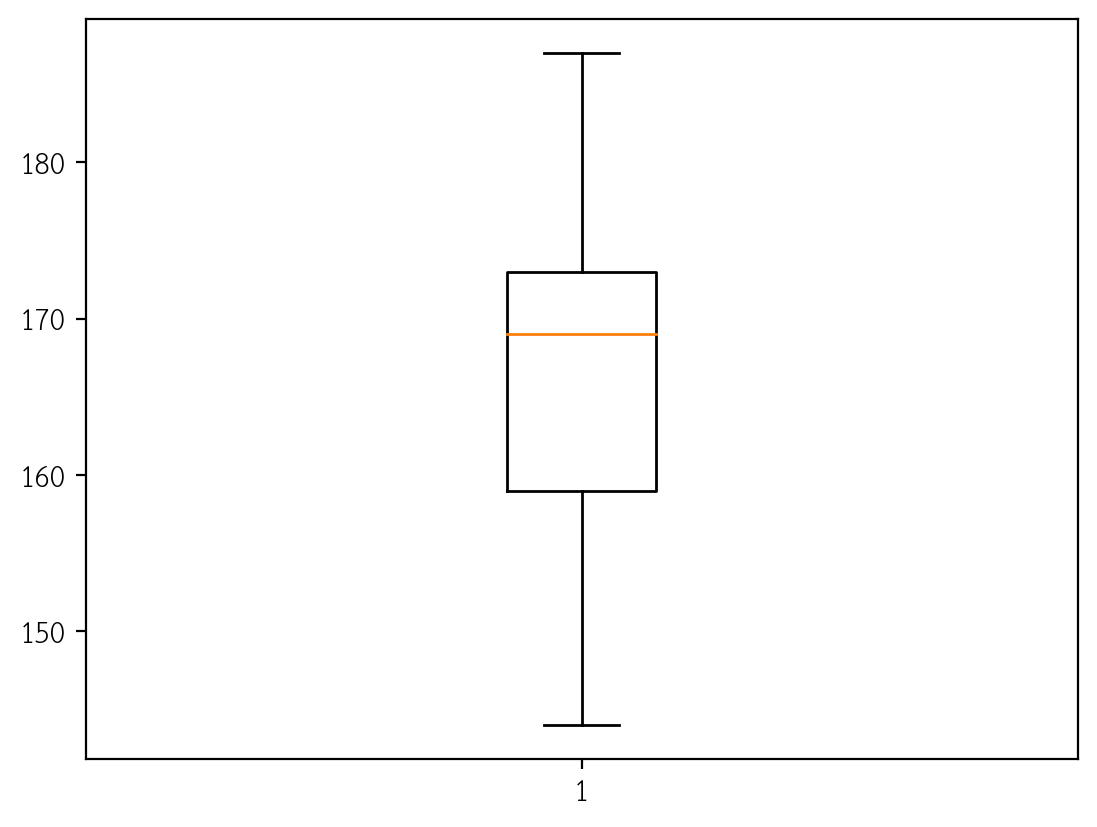

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eeb2dcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eeb2e200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeb2da20>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eeb2e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eeb2e9e0>],
 'means': []}

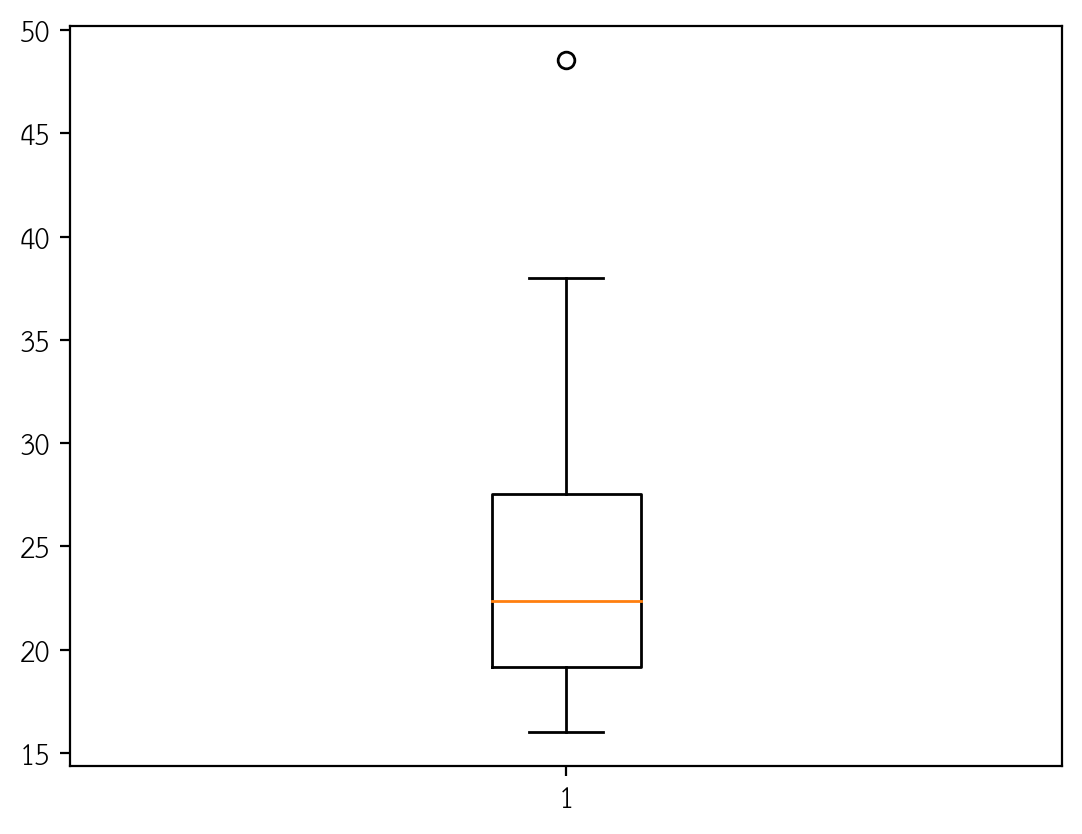

In [ ]:
plt.boxplot(data['BMI'])



#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

In [ ]:
col = ['Age', 'BMI', 'Temp', 'RH', 'V', 'TMRT']

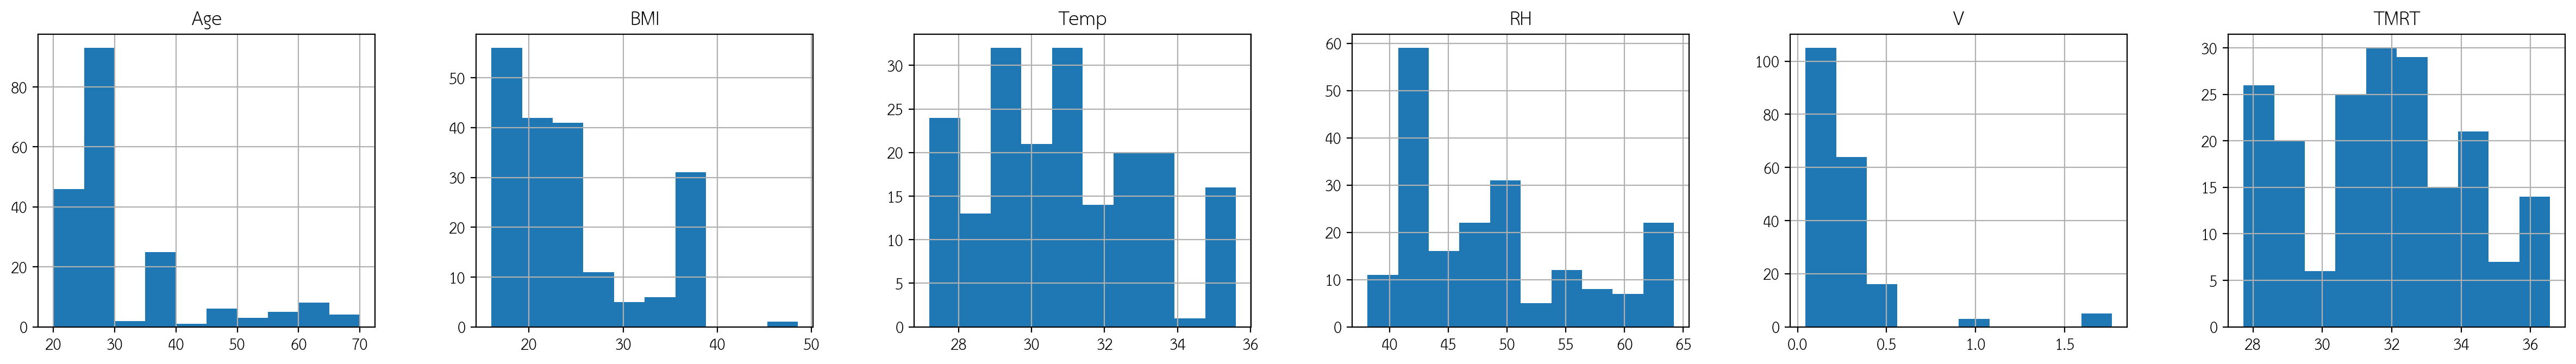

In [ ]:
data[col].hist(layout=(1, len(col)), figsize=(5 * len(col), 3.5));

#แบ่งกลุ่มข้อมูล

In [6]:
def convert_to_buckets(Age):
    if 20 <= Age <= 39:
          return 'วัยหนุ่มสาว'
    elif 40 <= Age <= 59:
          return 'วัยกลางคน'
    else:
        return 'วัยชรา'

In [7]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

วัยหนุ่มสาว    166
วัยกลางคน       15
วัยชรา          12
Name: age_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

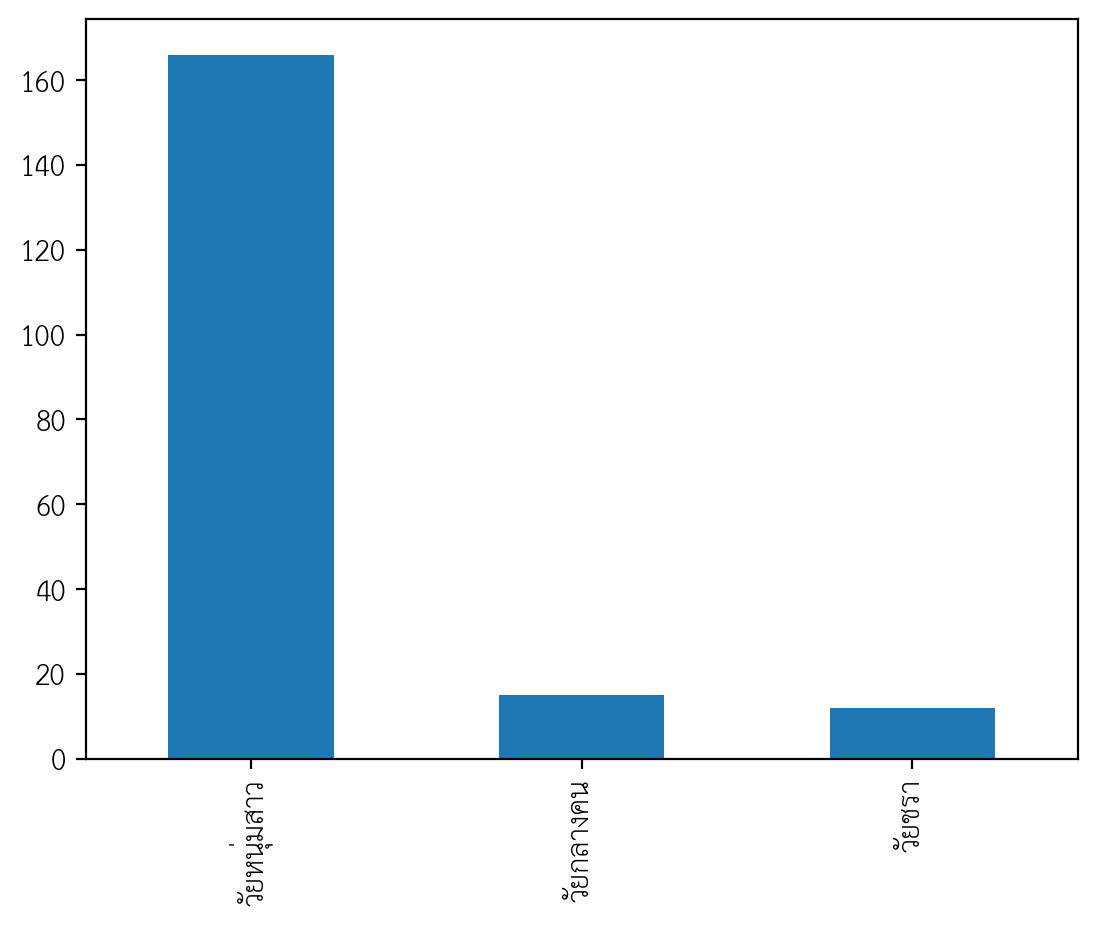

In [ ]:
data['age_cat'].value_counts().plot(kind='bar')

In [8]:
def convert_to_buckets(V):
    if V < 0.29:
          return 'ลมสงบ'
    elif V < 1.6:
          return 'ลมเบา'
    else:
        return 'ลมอ่อน'

In [9]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

ลมสงบ     132
ลมเบา      56
ลมอ่อน      5
Name: v_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

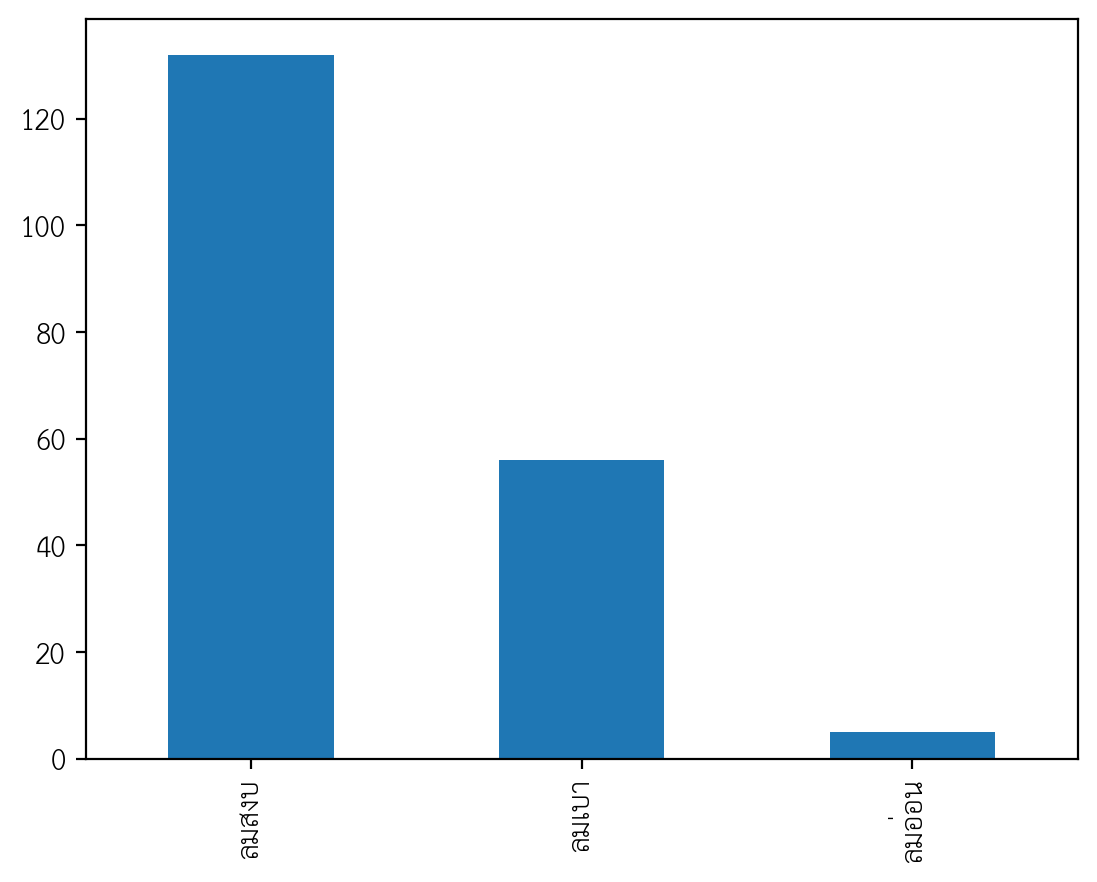

In [ ]:
data['v_cat'].value_counts().plot(kind='bar')

In [10]:
def convert_to_buckets(RH):
    if RH < 40:
          return 'แห้งเกินไป'
    elif RH < 60:
          return 'ความชื้นเหมาะสม'
    else:
        return 'ชื้นเกินไป'

In [11]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

ความชื้นเหมาะสม    163
ชื้นเกินไป          22
แห้งเกินไป           8
Name: rh_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

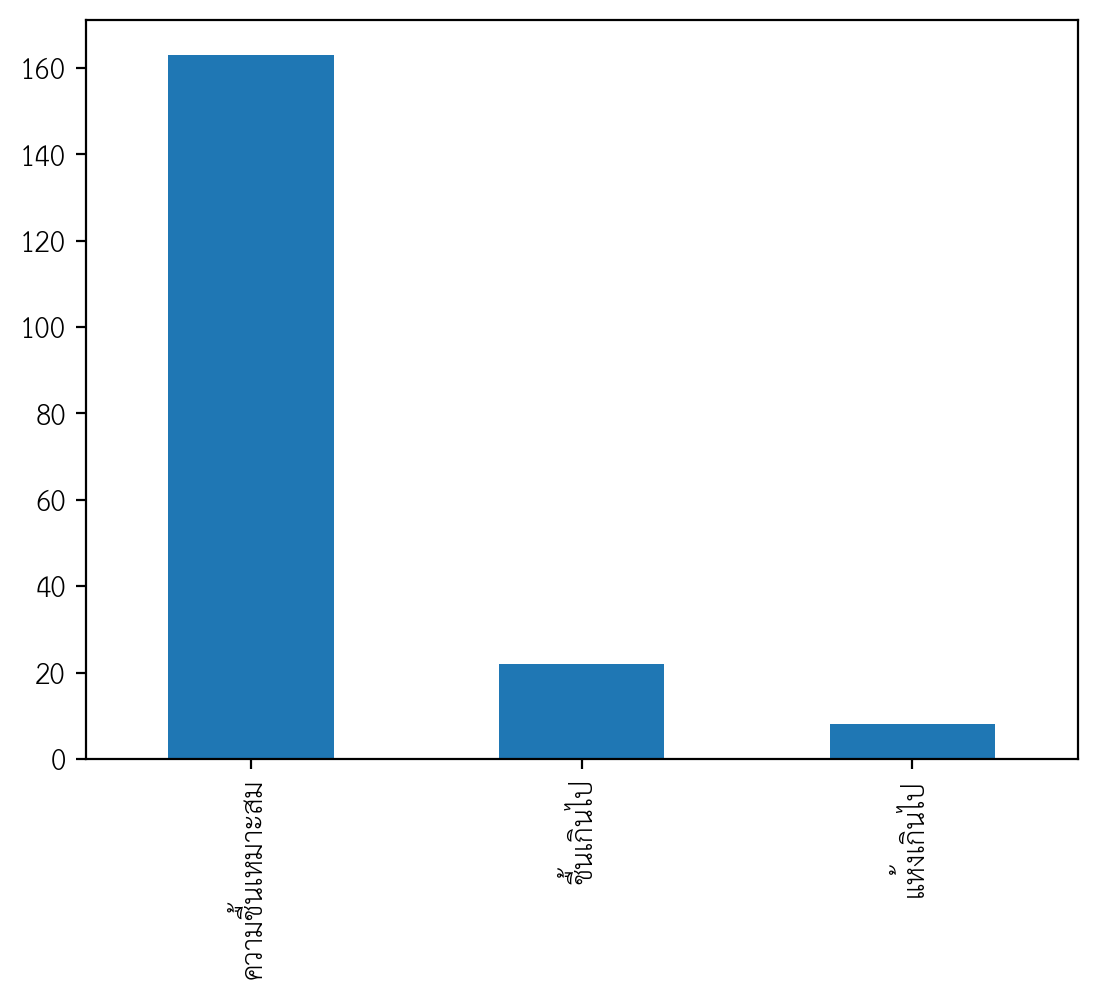

In [ ]:
data['rh_cat'].value_counts().plot(kind='bar')

In [12]:
def convert_to_buckets(BMI):
    if BMI < 18.5:
          return 'น้ำหนักต่ำกว่าเกณฑ์'
    elif 18.5 < BMI <= 22.9:
          return 'สมส่วน'
    elif 23 <= BMI <= 24.9:
          return 'น้ำหนักเกิน'
    elif 25 <= BMI <= 29.9:
          return 'โรคอ้วนระดับที่ 1'
    else:
          return 'โรคอ้วนระดับที่ 2'

In [13]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

สมส่วน                 63
โรคอ้วนระดับที่ 2      41
น้ำหนักต่ำกว่าเกณฑ์    39
น้ำหนักเกิน            36
โรคอ้วนระดับที่ 1      14
Name: bmi_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

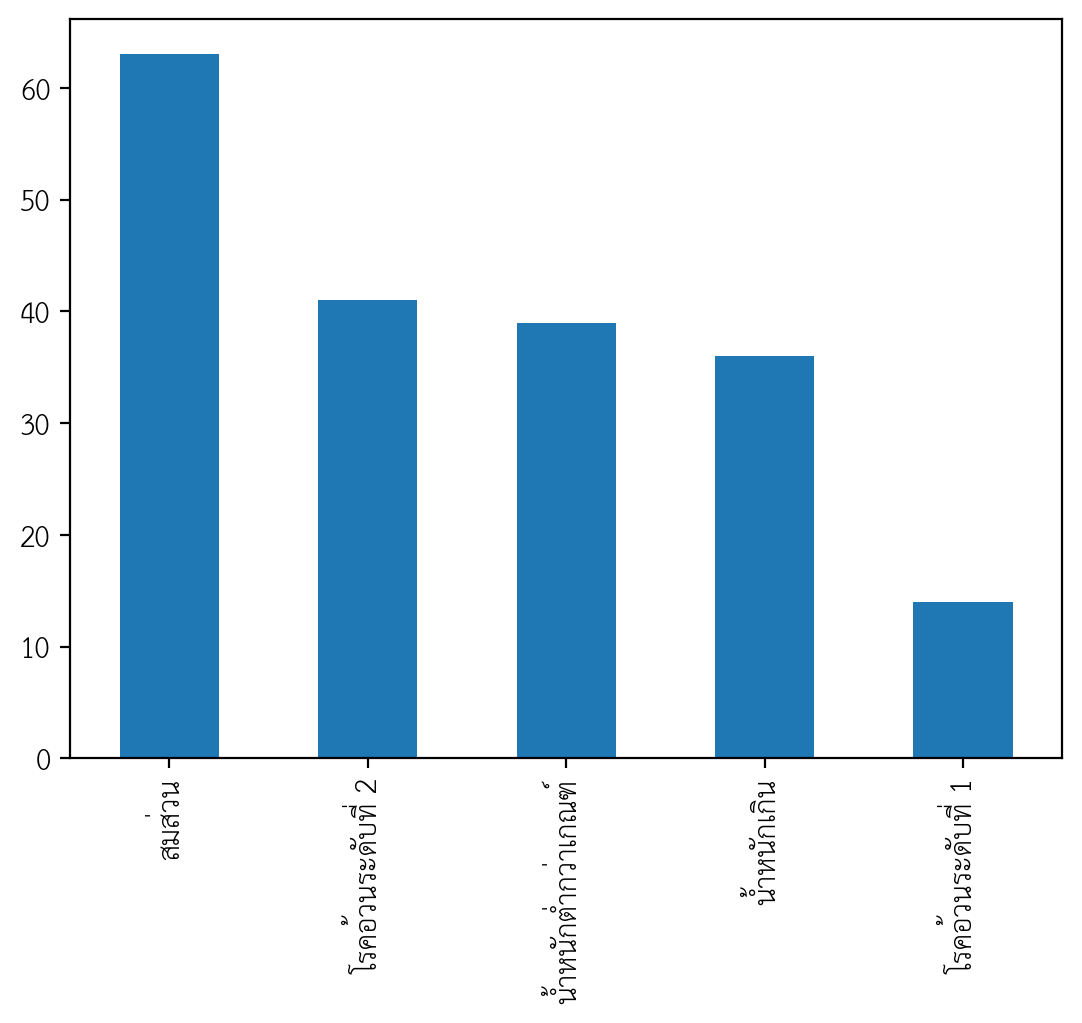

In [ ]:
data['bmi_cat'].value_counts().plot(kind='bar')

In [14]:
def convert_to_buckets(Temp):
    if 23 <= Temp <= 28.9:
          return 'อากาศค่อนข้างเย็น'
    elif 29 <= Temp <= 34.9:
          return 'อากาศค่อนข้างร้อน'
    elif 35.0 <= Temp <= 39.9:
          return 'อากาศร้อน'

In [15]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

อากาศค่อนข้างร้อน    137
อากาศค่อนข้างเย็น     40
อากาศร้อน             16
Name: temp_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

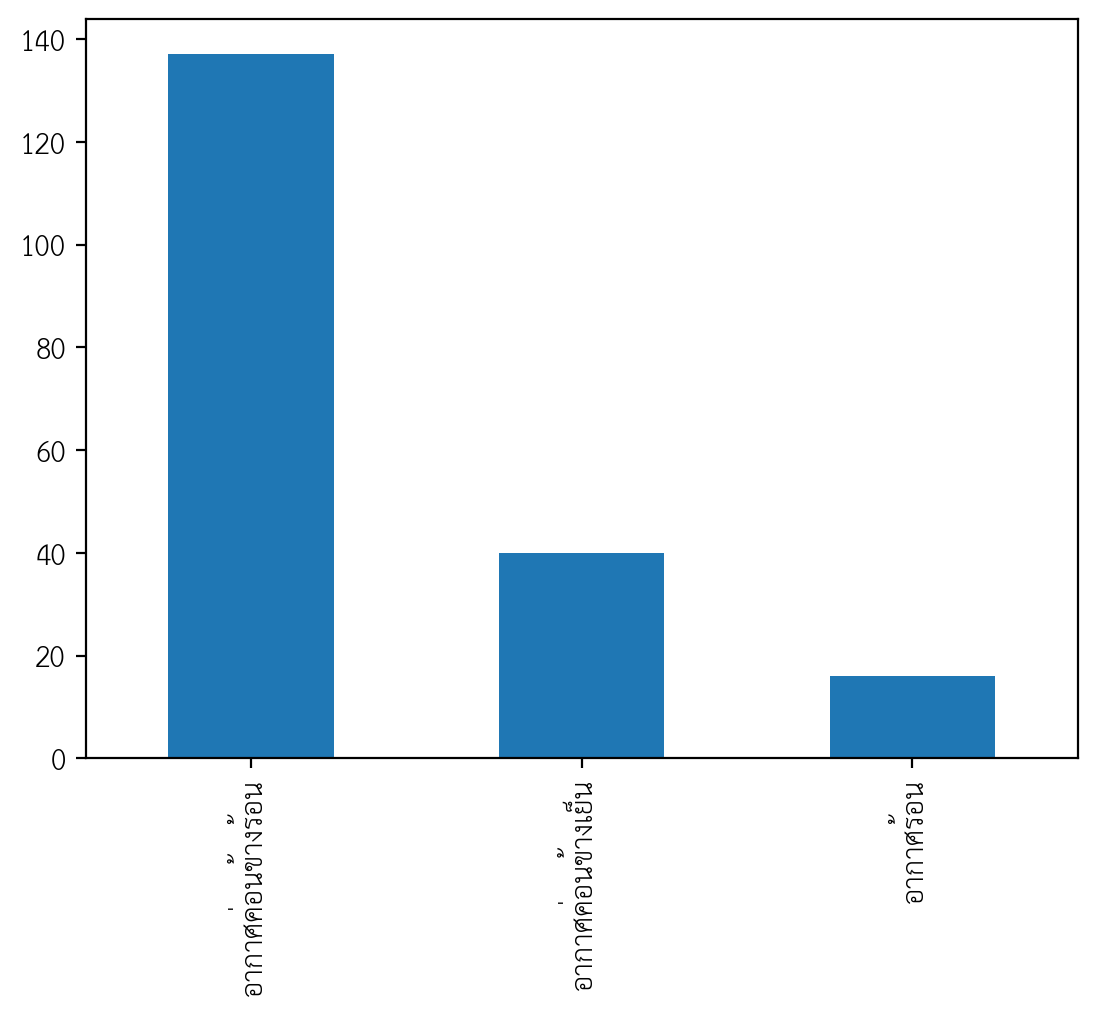

In [ ]:
data['temp_cat'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

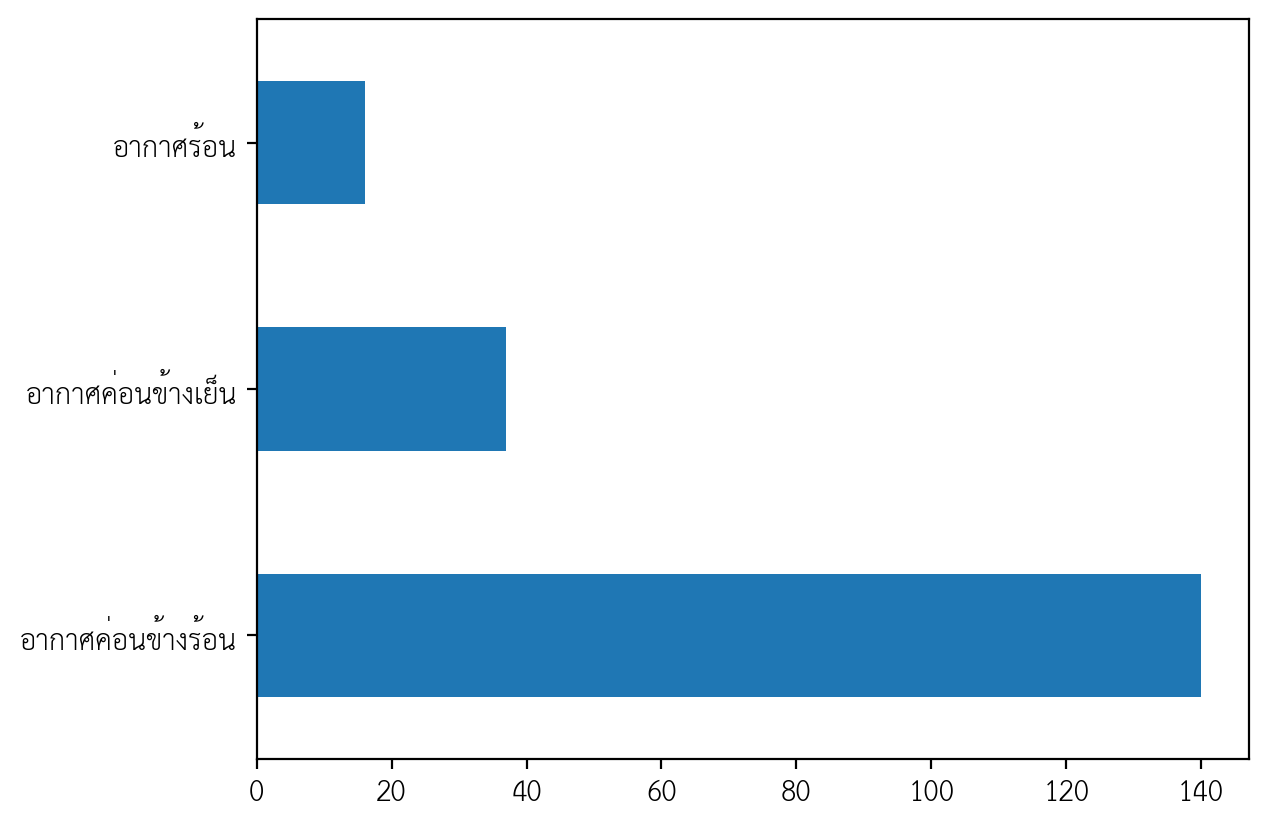

In [ ]:
data['temp_cat'].value_counts().plot(kind='barh')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

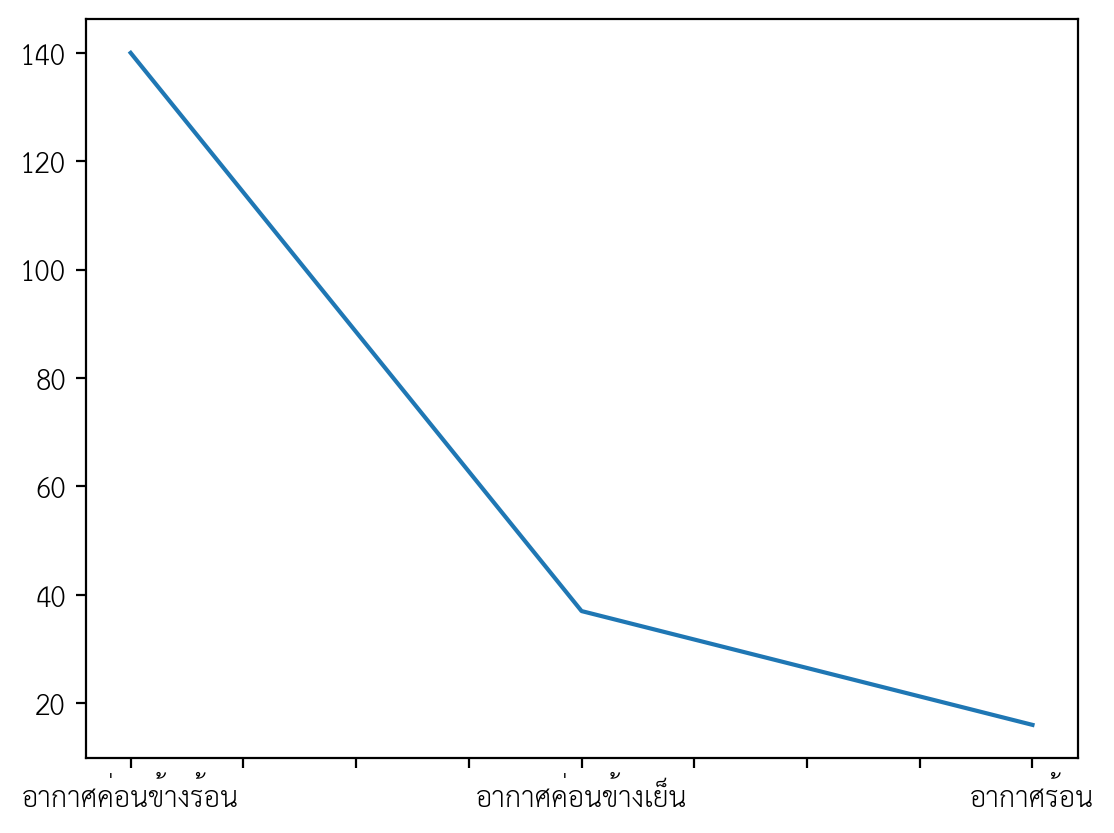

In [ ]:
data['temp_cat'].value_counts().plot()

#Association Rules

In [16]:
!pip install apyori

In [17]:
!pip install mlxtend

In [70]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## ##fo mapping

In [18]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดอุณหภูมิ(TS)',
    1:'รู้สึกน้อยอุณหภูมิ(TS)',
    2:'รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)',
    3:'รู้สึกปานกลางอุณหภูมิ(TS)',
    4:'รู้สึกค่อนข้างมากอุณหภูมิ(TS)',
    5:'รู้สึกมากอุณหภูมิ(TS)',
    6:'รู้สึกมากที่สุดอุณหภูมิ(TS)'
}

data['อุณหภูมิ(TS)'] = data['อุณหภูมิ'].map(fo_mapping)

In [19]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดความชื้น(TS)',
    1:'รู้สึกน้อยความชื้น(TS)',
    2:'รู้สึกค่อนข้างน้อยความชื้น(TS)',
    3:'รู้สึกปานกลางความชื้น(TS)',
    4:'รู้สึกค่อนข้างมากความชื้น(TS)',
    5:'รู้สึกมากความชื้น(TS)',
    6:'รู้สึกมากที่สุดความชื้น(TS)'
}

data['ความชื้น(TS)'] = data['ความชื้น'].map(fo_mapping)

In [20]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดกระแสลม(TS)',
    1:'รู้สึกน้อยกระแสลม(TS)',
    2:'รู้สึกค่อนข้างน้อยกระแสลม(TS)',
    3:'รู้สึกปานกลางกระแสลม(TS)',
    4:'รู้สึกค่อนข้างมากกระแสลม(TS)',
    5:'รู้สึกมากกระแสลม(TS)',
    6:'รู้สึกมากที่สุดกระแสลม(TS)'
}

data['กระแสลม(TS)'] = data['กระแสลม'].map(fo_mapping)

In [21]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)',
    1:'รู้สึกน้อยความแรงของแสงแดด(TS)',
    2:'รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)',
    3:'รู้สึกปานกลางความแรงของแสงแดด(TS)',
    4:'รู้สึกค่อนข้างมากความแรงของแสงแดด(TS)',
    5:'รู้สึกมากความแรงของแสงแดด(TS)',
    6:'รู้สึกมากที่สุดความแรงของแสงแดด(TS)'
}

data['ความแรงของแสงแดด(TS)'] = data['ความแรงของแสงแดด'].map(fo_mapping)

In [22]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)',
    1:'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)',
    2:'รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)',
    3:'รู้สึกปานกลางเหงื่อบริเวณผิวหนัง(TS)',
    4:'รู้สึกค่อนข้างมากเหงื่อบริเวณผิวหนัง(TS)',
    5:'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)',
    6:'รู้สึกมากที่สุดเหงื่อบริเวณผิวหนัง(TS)'
}

data['เหงื่อบริเวณผิวหนัง(TS)'] = data['เหงื่อบริเวณผิวหนัง'].map(fo_mapping)

In [23]:
fo_mapping = {
    -1 :'ลดน้อยลงอุณหภูมิ(PT)',
    0 :'เท่าเดิมอุณหภูมิ(PT)',
    1 :'เพิ่มมากขึ้นอุณหภูมิ(PT)'
}

data['อุณหภูมิ(PT)'] = data['ความร้อน'].map(fo_mapping)

In [24]:
fo_mapping = {
    -1 :'ลดน้อยลงความชื้น(PT)',
    0 :'เท่าเดิมความชื้น(PT)',
    1 :'เพิ่มมากขึ้นความชื้น(PT)'
}

data['ความชื้น(PT)'] = data['ความชื้น.1'].map(fo_mapping)

In [25]:
fo_mapping = {
    -1 :'ลดน้อยลงกระแสลม(PT)',
    0 :'เท่าเดิมกระแสลม(PT)',
    1 :'เพิ่มมากขึ้นกระแสลม(PT)'
}

data['กระแสลม(PT)'] = data['กระแสลม.1'].map(fo_mapping)

In [26]:
fo_mapping = {
    -1 :'ลดน้อยลงความแรงของแสงแดด(PT)',
    0 :'เท่าเดิมความแรงของแสงแดด(PT)',
    1 :'เพิ่มมากขึ้นความแรงของแสงแดด(PT)'
}

data['ความแรงของแสงแดด(PT)'] = data['แสงแดด'].map(fo_mapping)

In [27]:
fo_mapping = {
    -1 :'ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)',
    0 :'เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)',
    1 :'เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)'
}

data['เหงื่อบริเวณผิวหนัง(PT)'] = data['เหงื่อบริเวณผิวหนัง.1'].map(fo_mapping)

In [28]:
data.columns

Index(['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp',
       'Globe temp', 'RH', 'V', 'Thermal_acceptance', 'Thermal_sensation_Vote',
       'อุณหภูมิ', 'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด',
       'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1', 'กระแสลม.1', 'แสงแดด',
       'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met', 'seasons', 'age_cat',
       'v_cat', 'rh_cat', 'bmi_cat', 'temp_cat', 'อุณหภูมิ(TS)',
       'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)',
       'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)',
       'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)'],
      dtype='object')

##รวมกลุ่ม

In [29]:
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกน้อยที่สุดอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'

data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างมากอุณหภูมิ(TS)'] = 'รู้สึกมากอุณหภูมิ(TS)'
data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกมากที่สุดอุณหภูมิ(TS)'] = 'รู้สึกมากอุณหภูมิ(TS)'

<ipython-input-29-5f6fe782cb98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกน้อยที่สุดอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
<ipython-input-29-5f6fe782cb98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['อุณหภูมิ(TS)'][data['อุณหภูมิ(TS)']=='รู้สึกค่อนข้างน้อยอุณหภูมิ(TS)'] = 'รู้สึกน้อยอุณหภูมิ(TS)'
<ipython-input-29-5f6fe782cb98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [30]:
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกน้อยที่สุดความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างน้อยความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'

data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างมากความชื้น(TS)'] = 'รู้สึกมากความชื้น(TS)'
data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกมากที่สุดความชื้น(TS)'] = 'รู้สึกมากความชื้น(TS)'

<ipython-input-30-26a41711dd8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกน้อยที่สุดความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
<ipython-input-30-26a41711dd8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความชื้น(TS)'][data['ความชื้น(TS)']=='รู้สึกค่อนข้างน้อยความชื้น(TS)'] = 'รู้สึกน้อยความชื้น(TS)'
<ipython-input-30-26a41711dd8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [31]:
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกน้อยที่สุดกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างน้อยกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'

data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างมากกระแสลม(TS)'] = 'รู้สึกมากกระแสลม(TS)'
data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกมากที่สุดกระแสลม(TS)'] = 'รู้สึกมากกระแสลม(TS)'

<ipython-input-31-caaa4db41cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกน้อยที่สุดกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
<ipython-input-31-caaa4db41cf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['กระแสลม(TS)'][data['กระแสลม(TS)']=='รู้สึกค่อนข้างน้อยกระแสลม(TS)'] = 'รู้สึกน้อยกระแสลม(TS)'
<ipython-input-31-caaa4db41cf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'

data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างมากความแรงของแสงแดด(TS)'] = 'รู้สึกมากความแรงของแสงแดด(TS)'
data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกมากที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกมากความแรงของแสงแดด(TS)'

<ipython-input-32-3de1c74c649c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกน้อยที่สุดความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
<ipython-input-32-3de1c74c649c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ความแรงของแสงแดด(TS)'][data['ความแรงของแสงแดด(TS)']=='รู้สึกค่อนข้างน้อยความแรงของแสงแดด(TS)'] = 'รู้สึกน้อยความแรงของแสงแดด(TS)'
<ipython-input-32-3de1c74c649c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [33]:
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'

data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างมากเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)'
data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกมากที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกมากเหงื่อบริเวณผิวหนัง(TS)'

<ipython-input-33-227ae1d64912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกน้อยที่สุดเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
<ipython-input-33-227ae1d64912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['เหงื่อบริเวณผิวหนัง(TS)'][data['เหงื่อบริเวณผิวหนัง(TS)']=='รู้สึกค่อนข้างน้อยเหงื่อบริเวณผิวหนัง(TS)'] = 'รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)'
<ipython-input-33-227ae1d64912>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

##frequently plot (10 variable)

<Axes: >

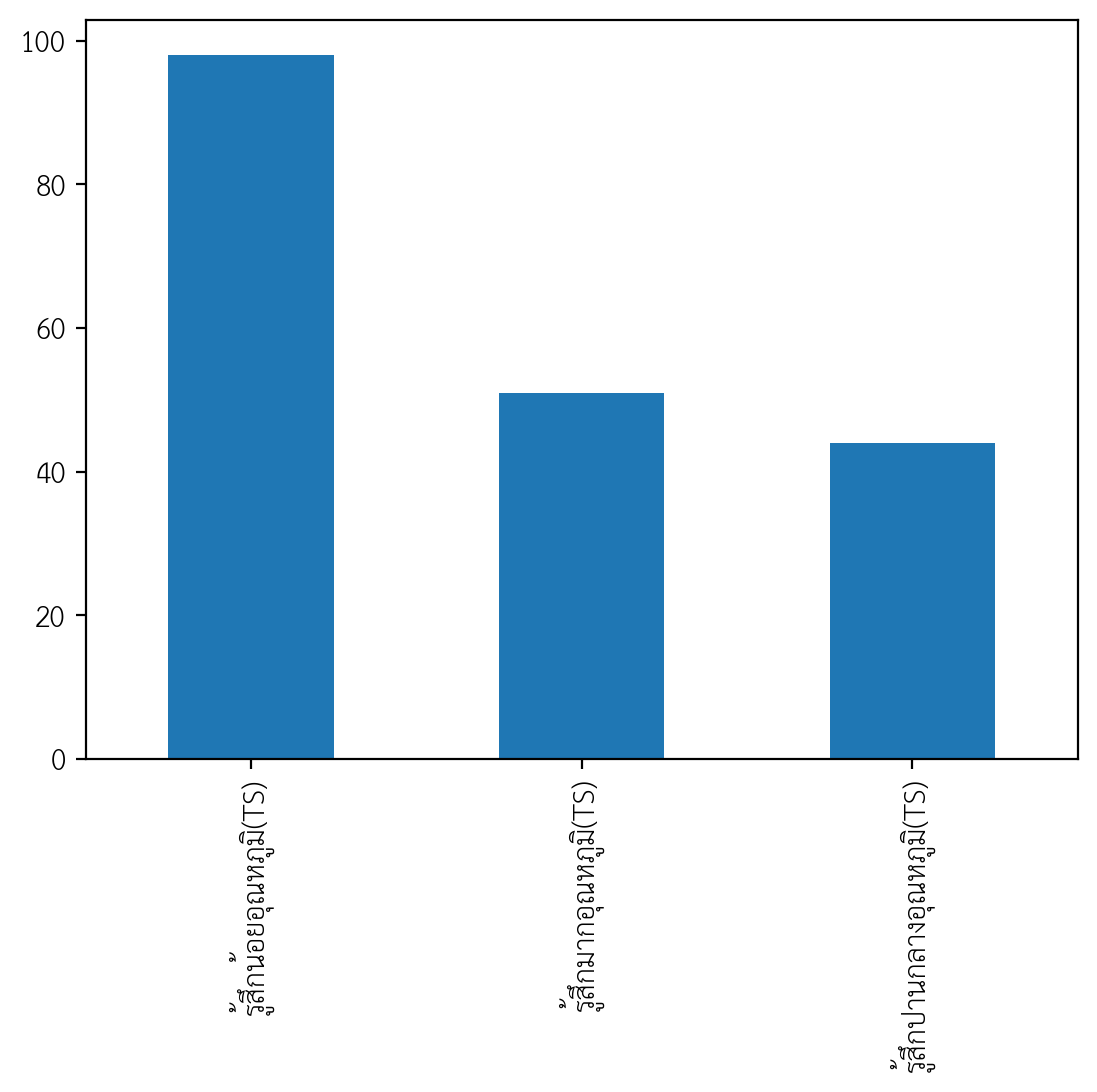

In [55]:
data['อุณหภูมิ(TS)'].value_counts().plot(kind='bar')

<Axes: >

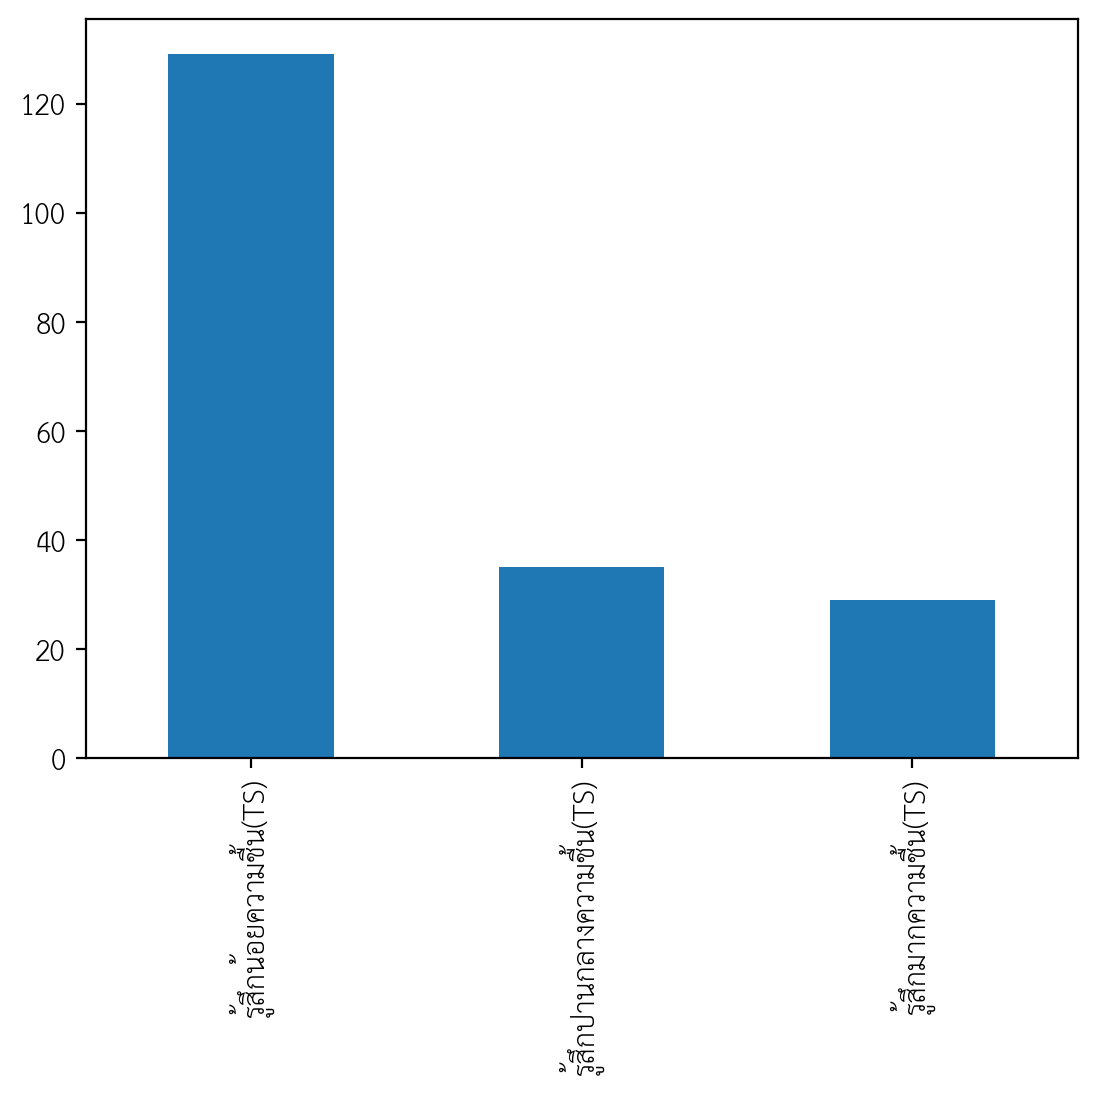

In [56]:
data['ความชื้น(TS)'].value_counts().plot(kind='bar')

<Axes: >

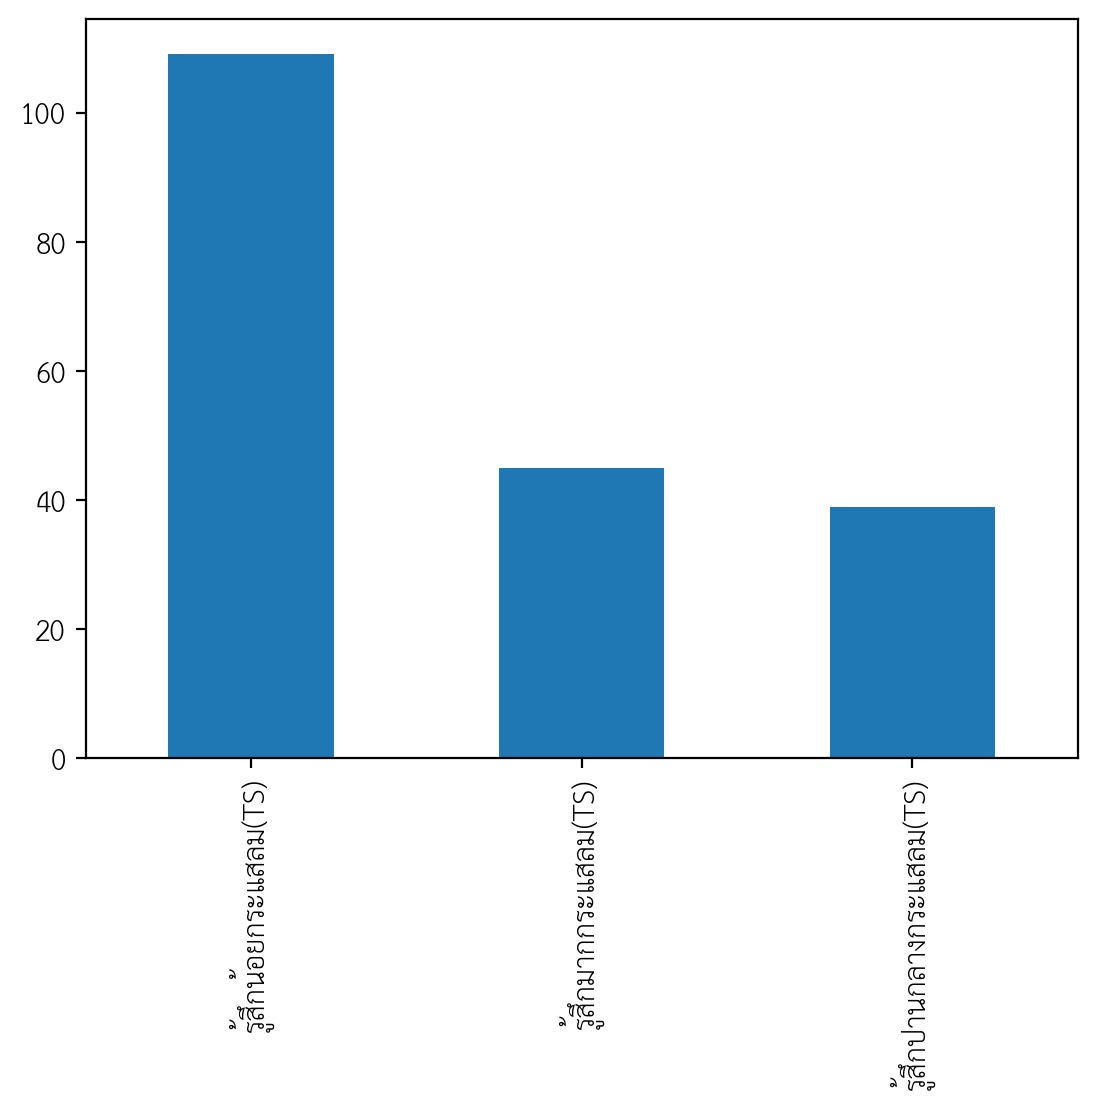

In [57]:
data['กระแสลม(TS)'].value_counts().plot(kind='bar')

<Axes: >

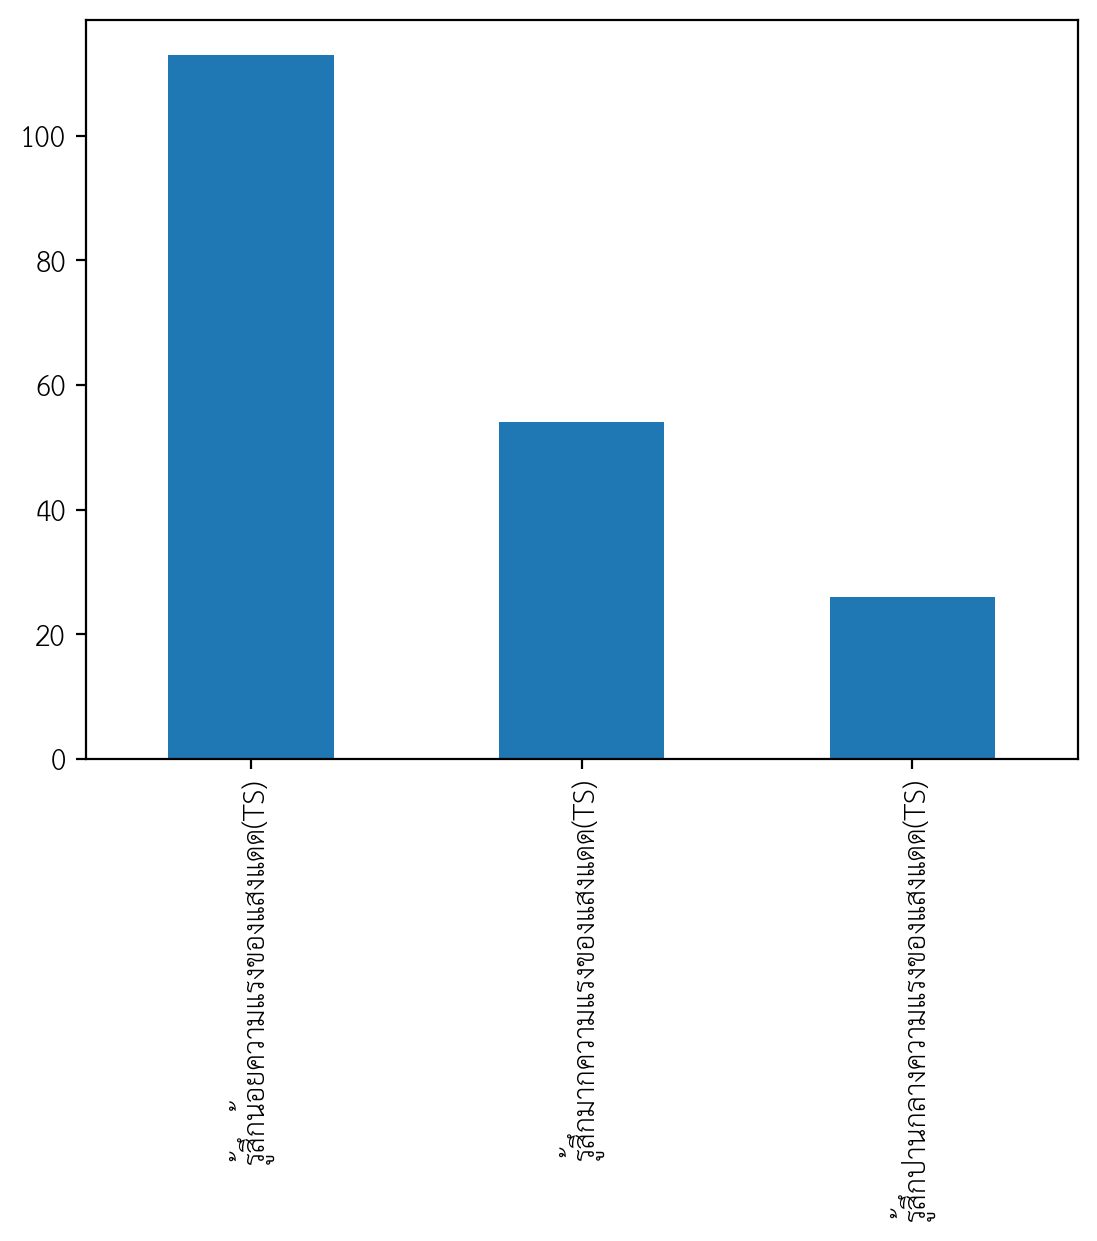

In [58]:
data['ความแรงของแสงแดด(TS)'].value_counts().plot(kind='bar')

<Axes: >

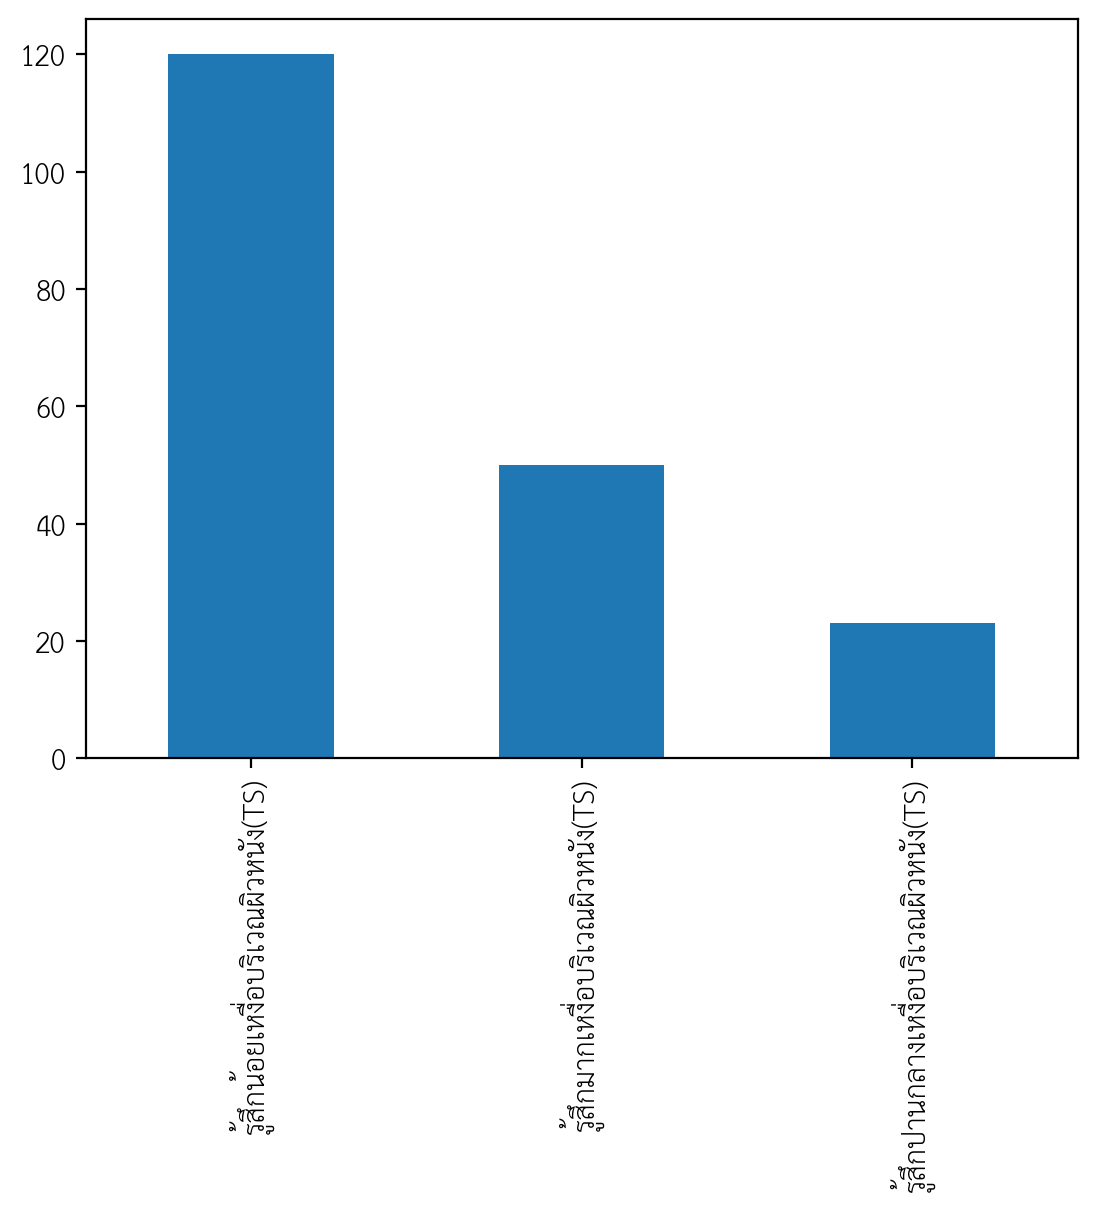

In [59]:
data['เหงื่อบริเวณผิวหนัง(TS)'].value_counts().plot(kind='bar')

<Axes: >

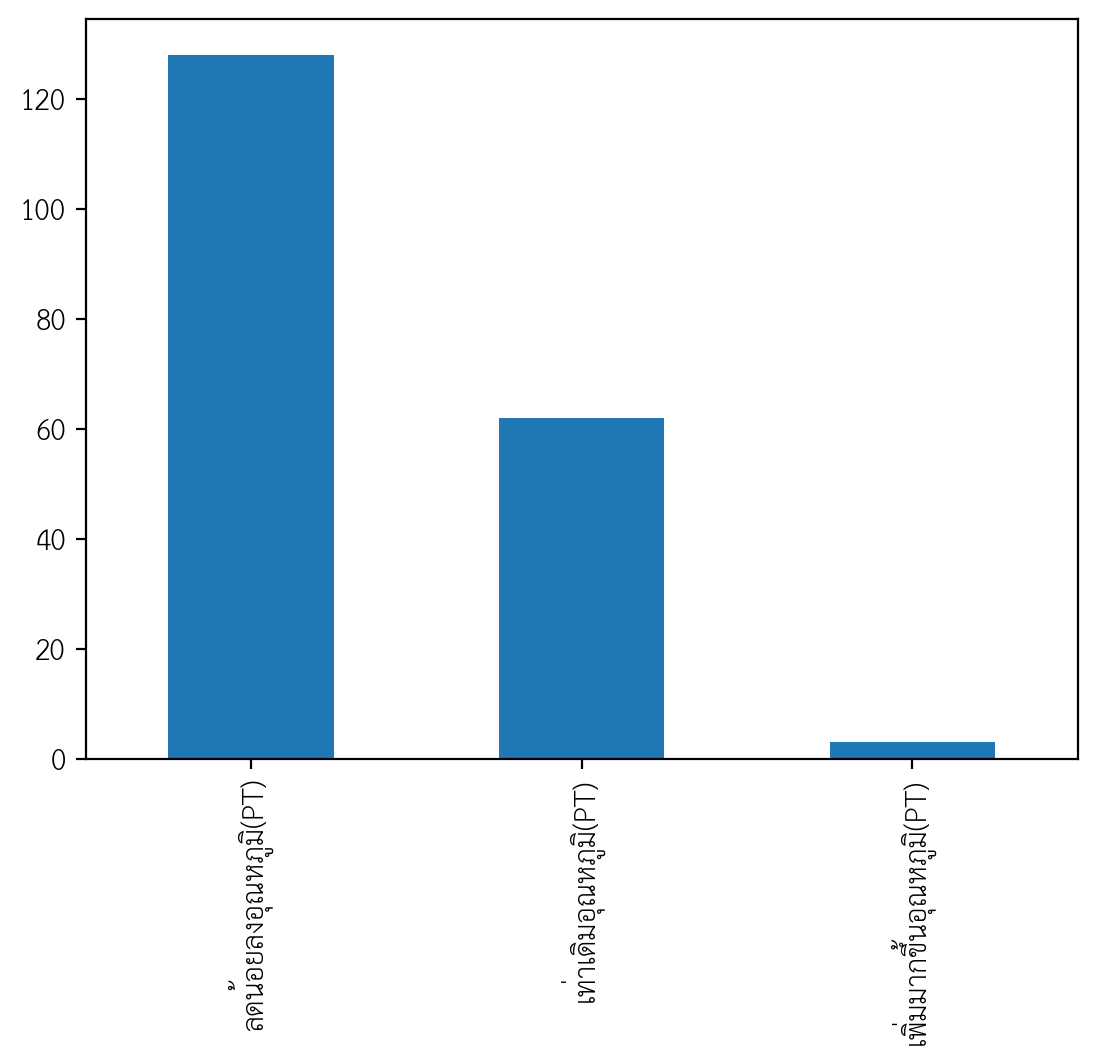

In [60]:
data['อุณหภูมิ(PT)'].value_counts().plot(kind='bar')

<Axes: >

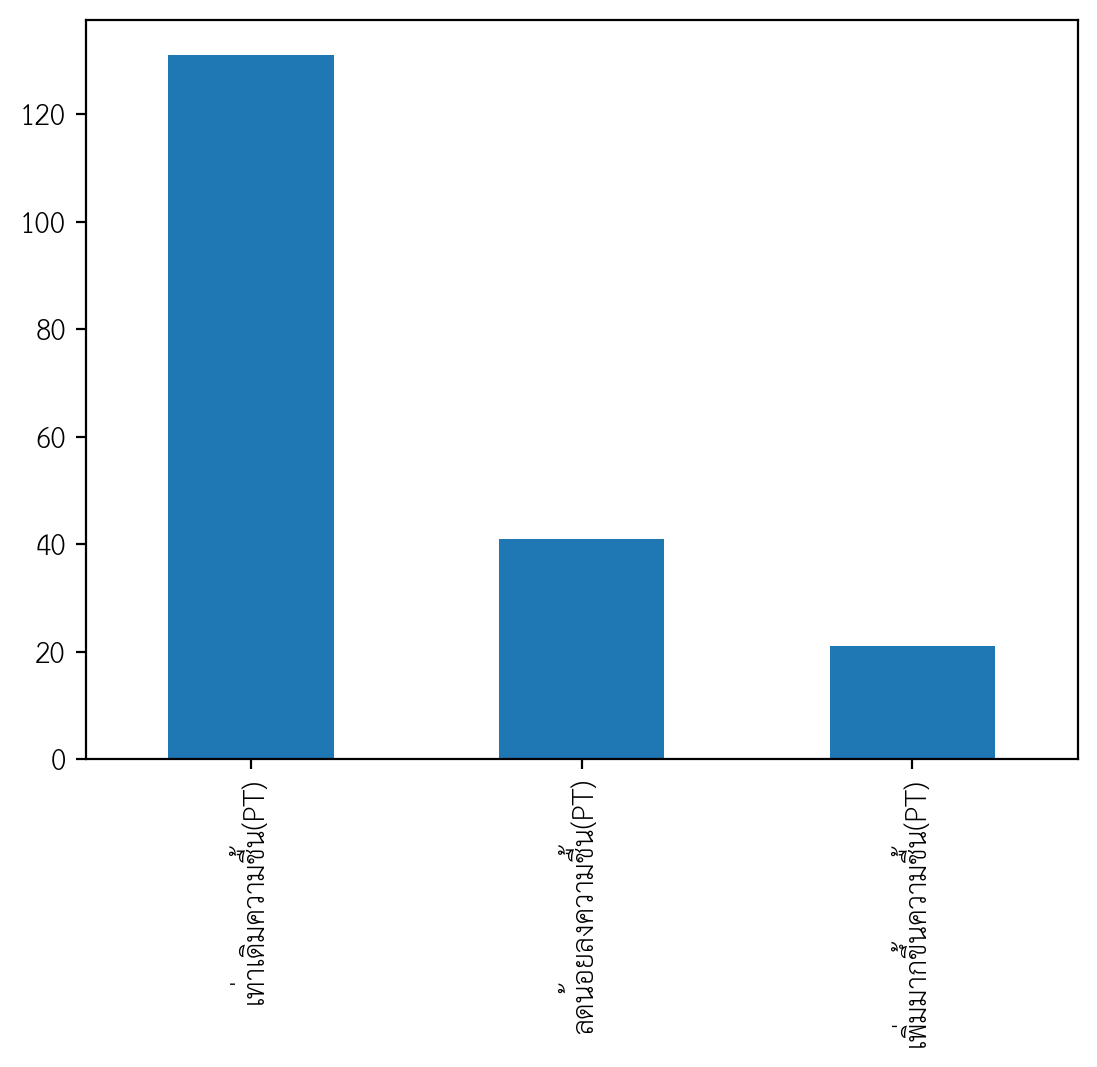

In [61]:
data['ความชื้น(PT)'].value_counts().plot(kind='bar')

<Axes: >

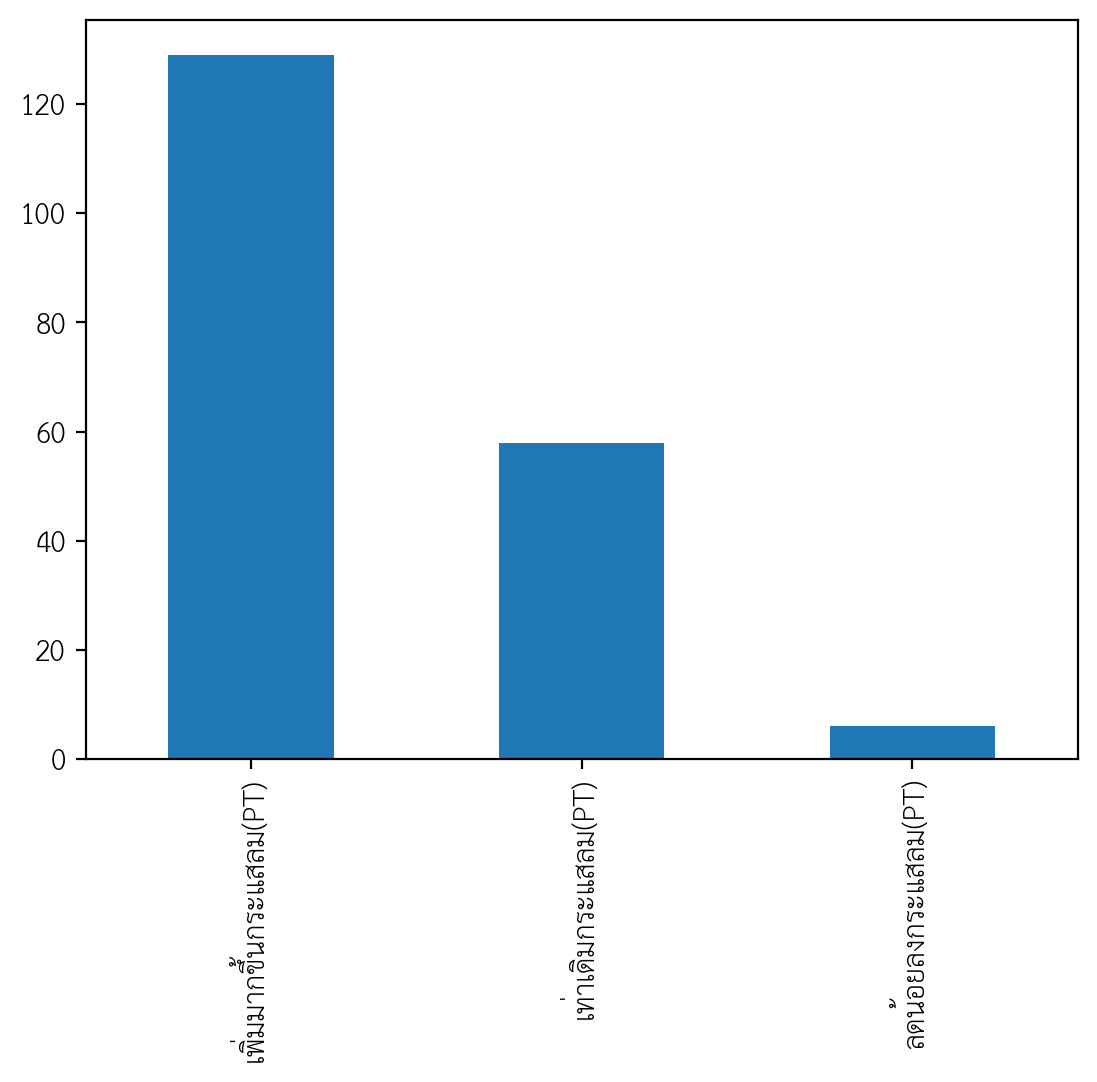

In [62]:
data['กระแสลม(PT)'].value_counts().plot(kind='bar')

<Axes: >

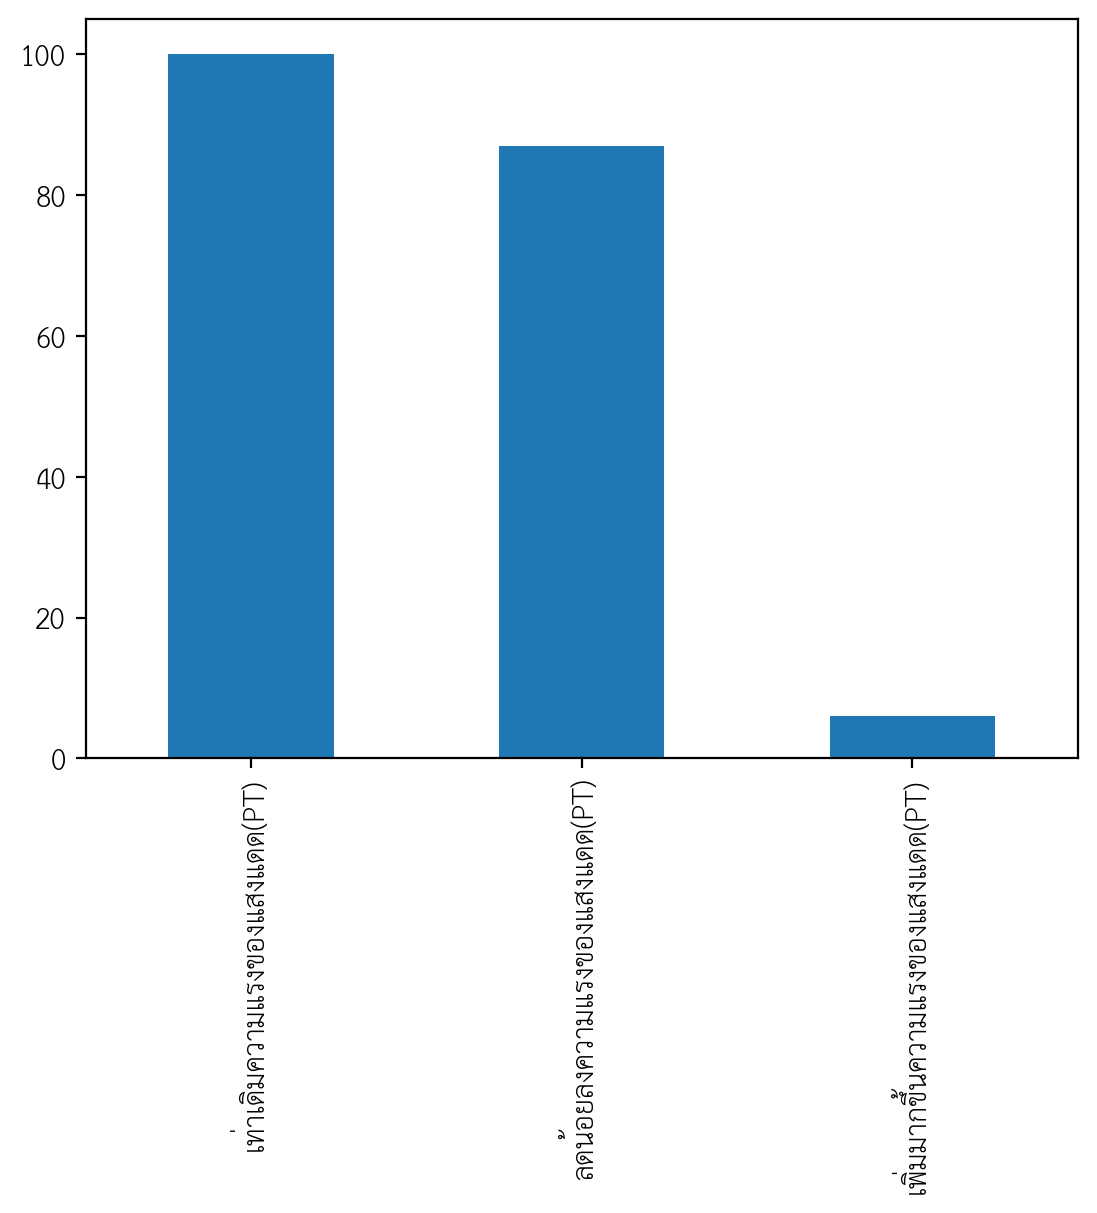

In [63]:
data['ความแรงของแสงแดด(PT)'].value_counts().plot(kind='bar')

<Axes: >

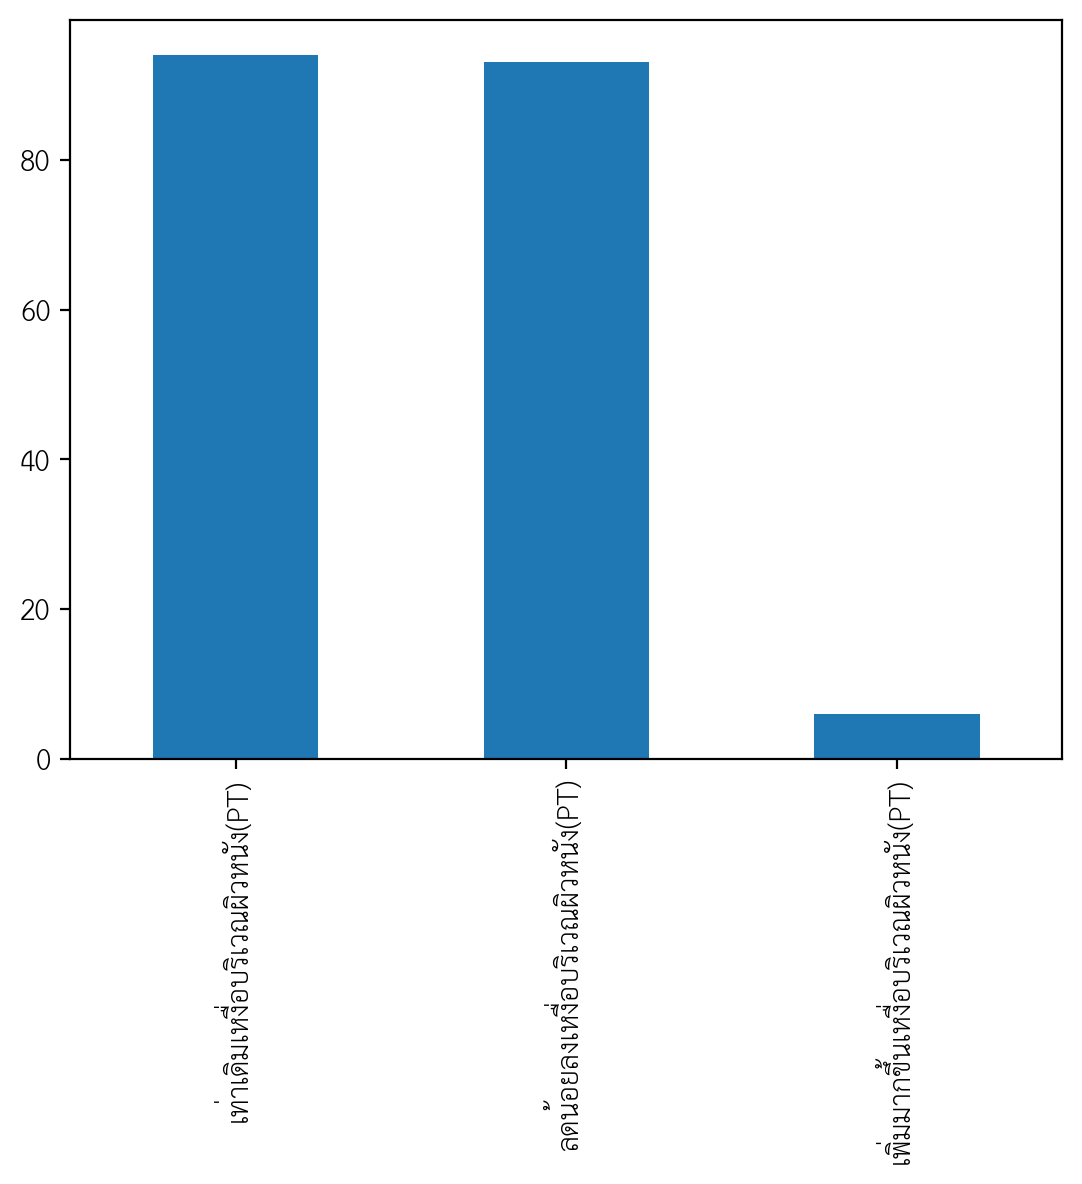

In [64]:
data['เหงื่อบริเวณผิวหนัง(PT)'].value_counts().plot(kind='bar')

In [65]:
data.columns

Index(['เพศ', 'Age', 'Weight', 'Height', 'BMI', 'พื้นที่ทำแบบสอบถาม', 'Temp',
       'Globe temp', 'RH', 'V', 'Thermal_acceptance', 'Thermal_sensation_Vote',
       'อุณหภูมิ', 'ความชื้น', 'กระแสลม', 'ความแรงของแสงแดด',
       'เหงื่อบริเวณผิวหนัง', 'ความร้อน', 'ความชื้น.1', 'กระแสลม.1', 'แสงแดด',
       'เหงื่อบริเวณผิวหนัง.1', 'TMRT', 'Clo', 'Met', 'seasons', 'age_cat',
       'v_cat', 'rh_cat', 'bmi_cat', 'temp_cat', 'อุณหภูมิ(TS)',
       'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)',
       'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)',
       'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)',
       'Thermal_Sensation_Vote'],
      dtype='object')

In [66]:
fo_mapping = {
    -1 :'ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT)',
    0 :'เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)',
    1 :'เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)'
}

data['เหงื่อบริเวณผิวหนัง(PT)'] = data['เหงื่อบริเวณผิวหนัง.1'].map(fo_mapping)

In [67]:
fo_mapping = {
    -3 :'หนาว(-3)',
    -2 :'เย็น(-2)',
    -1 :'เย็นเล็กน้อย(-1)',
    0 :'ปกติ(0)',
    1 :'ร้อนเล็กน้อย(1)',
    2 :'ร้อน(2)',
    3 :'ร้อนมาก(3)',
}

data['Thermal_Sensation_Vote'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [68]:
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)'] = 'เย็นเล็กน้อย(-1)'
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='เย็น(-2)'] = 'เย็นเล็กน้อย(-1)'

data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='ร้อน(2)'] = 'ร้อนเล็กน้อย(1)'
data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='ร้อนมาก(3)'] = 'ร้อนเล็กน้อย(1)'

<ipython-input-68-33e31b83e89d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='หนาว(-3)'] = 'เย็นเล็กน้อย(-1)'
<ipython-input-68-33e31b83e89d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Thermal_Sensation_Vote'][data['Thermal_Sensation_Vote']=='เย็น(-2)'] = 'เย็นเล็กน้อย(-1)'
<ipython-input-68-33e31b83e89d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [69]:
data['Thermal_Sensation_Vote'].value_counts()

ร้อนเล็กน้อย(1)     91
ปกติ(0)             59
เย็นเล็กน้อย(-1)    43
Name: Thermal_Sensation_Vote, dtype: int64

##Thermal acceptance

In [108]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat',  'พื้นที่ทำแบบสอบถาม','seasons','เพศ','Thermal_acceptance', 'อุณหภูมิ(TS)', 'ความชื้น(TS)',
           'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)',
           'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,พื้นที่ทำแบบสอบถาม,seasons,เพศ,Thermal_acceptance,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกน้อยกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เพิ่มมากขึ้นกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,หญิง,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกน้อยความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),เท่าเดิมความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกปานกลางความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกมากความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)


In [110]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,Unaccept,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,ภายนอก / ใต้ร่มไม้,...,เท่าเดิมอุณหภูมิ(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT),เพิ่มมากขึ้นกระแสลม(PT),เพิ่มมากขึ้นความชื้น(PT),เพิ่มมากขึ้นความแรงของแสงแดด(PT),เพิ่มมากขึ้นอุณหภูมิ(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT),แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,True,False,False,True,True,True,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
1,True,False,False,True,True,True,False,False,True,False,...,True,True,True,False,False,False,False,False,False,False
2,True,False,False,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
3,True,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,True,False,False,True,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [112]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Accept,0.890625
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
อากาศค่อนข้างร้อน,0.713542
ลมสงบ,0.687500
เท่าเดิมความชื้น(PT),0.677083
เพิ่มมากขึ้นกระแสลม(PT),0.671875
รู้สึกน้อยความชื้น(TS),0.666667
ลดน้อยลงอุณหภูมิ(PT),0.661458
winter,0.661458


##mini sup

In [113]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.109375,(Unaccept)
2,0.338542,(summer)
3,0.661458,(winter)
4,0.843750,(ความชื้นเหมาะสม)
...,...,...
142202,0.119792,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
142203,0.104167,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
142204,0.104167,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
142205,0.104167,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."


In [114]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
16500,0.234375,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
16501,0.218750,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
16502,0.203125,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
16503,0.203125,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."


In [115]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
3466,0.312500,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
3467,0.312500,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
3468,0.322917,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
3469,0.312500,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."


In [116]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.661458,(winter)
2,0.843750,(ความชื้นเหมาะสม)
3,0.651042,(ชาย)
4,0.557292,(ภายนอก/ มีหลังคาคลุม)
...,...,...
648,0.406250,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
649,0.406250,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
650,0.411458,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."
651,0.411458,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), วัยหนุ่มสา..."


##min support = 0.5

In [ ]:
output5_1 = apriori(df, min_support=0.5, use_colnames=True)
output5_1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
12,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
49,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
28,0.776042,"(Accept, วัยหนุ่มสาว)"
...,...,...
92,0.500000,"(เท่าเดิมความชื้น(PT), รู้สึกน้อยความชื้น(TS),..."
61,0.500000,"(เท่าเดิมความชื้น(PT), รู้สึกน้อยเหงื่อบริเวณผ..."
80,0.500000,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, Accept)"
138,0.500000,"(winter, ความชื้นเหมาะสม, Accept, วัยหนุ่มสาว,..."


In [ ]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
8,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
23,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
18,0.776042,"(วัยหนุ่มสาว, Accept)"
13,0.750000,"(ความชื้นเหมาะสม, Accept)"
9,0.713542,(อากาศค่อนข้างร้อน)
29,0.703125,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, Accept)"
7,0.687500,(ลมสงบ)
10,0.677083,(เท่าเดิมความชื้น(PT))


In [ ]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.864583,(วัยหนุ่มสาว)
3,0.713542,(อากาศค่อนข้างร้อน)
4,0.750000,"(ความชื้นเหมาะสม, Accept)"
5,0.776042,"(วัยหนุ่มสาว, Accept)"
6,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
7,0.703125,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, Accept)"


In [ ]:
output8 = apriori(df, min_support=0.8, use_colnames=oht.columns_)
output8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.864583,(วัยหนุ่มสาว)


## mini conf

In [117]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(summer),0.890625,0.338542,0.250000,0.280702,0.829150,-0.051514,0.919588,-0.653251
1,(summer),(Accept),0.338542,0.890625,0.250000,0.738462,0.829150,-0.051514,0.418199,-0.237523
2,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
3,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
4,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
...,...,...,...,...,...,...,...,...,...,...
1440795,(Accept),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",0.890625,0.203125,0.203125,0.228070,1.122807,0.022217,1.032315,1.000000
1440796,(ความชื้นเหมาะสม),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",0.843750,0.218750,0.203125,0.240741,1.100529,0.018555,1.028963,0.584615
1440797,(เท่าเดิมความชื้น(PT)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",0.677083,0.218750,0.203125,0.300000,1.371429,0.055013,1.116071,0.838710
1440798,(เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)),"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",0.484375,0.234375,0.203125,0.419355,1.789247,0.089600,1.318576,0.855478


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
...,...,...,...,...,...,...,...,...,...,...
128269,(เท่าเดิมความแรงของแสงแดด(PT)),"(winter, วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), ...",0.520833,0.354167,0.312500,0.600000,1.694118,0.128038,1.614583,0.855072
128270,(Accept),"(winter, วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), ...",0.890625,0.312500,0.312500,0.350877,1.122807,0.034180,1.059122,1.000000
128271,(ความชื้นเหมาะสม),"(winter, วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), ...",0.843750,0.328125,0.312500,0.370370,1.128748,0.035645,1.067096,0.730000
128272,(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS)),"(winter, วัยหนุ่มสาว, รู้สึกน้อยอุณหภูมิ(TS), ...",0.625000,0.328125,0.312500,0.500000,1.523810,0.107422,1.343750,0.916667


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
...,...,...,...,...,...,...,...,...,...,...
8213,(วัยหนุ่มสาว),"(winter, รู้สึกน้อยความแรงของแสงแดด(TS), เท่าเ...",0.864583,0.421875,0.421875,0.487952,1.156627,0.057129,1.129044,1.000000
8214,(รู้สึกน้อยความแรงของแสงแดด(TS)),"(winter, วัยหนุ่มสาว, เท่าเดิมความแรงของแสงแดด...",0.588542,0.427083,0.421875,0.716814,1.678394,0.170519,2.023112,0.982341
8215,(เท่าเดิมความแรงของแสงแดด(PT)),"(winter, วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแ...",0.520833,0.468750,0.421875,0.810000,1.728000,0.177734,2.796053,0.879227
8216,(Accept),"(winter, วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแ...",0.890625,0.421875,0.421875,0.473684,1.122807,0.046143,1.098437,1.000000


##min threshold = 0.5

In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5_1 = association_rules(output5_1, metric = "confidence", min_threshold = 0.5)
frequent_conf5_1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
117,"(ภายนอก/ มีหลังคาคลุม, Accept)",(winter),0.541667,0.661458,0.541667,1.000000,1.511811,0.183377,inf,0.738636
279,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
309,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
311,(ภายนอก/ มีหลังคาคลุม),"(winter, วัยหนุ่มสาว)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
...,...,...,...,...,...,...,...,...,...,...
163,(Accept),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536
417,(Accept),"(ภายนอก/ มีหลังคาคลุม, winter, ความชื้นเหมาะสม)",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536
542,(Accept),"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, วัยหนุ...",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536
669,(Accept),"(ภายนอก/ มีหลังคาคลุม, winter, ความชื้นเหมาะสม...",0.890625,0.515625,0.500000,0.561404,1.088783,0.040771,1.104375,0.745536


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output6, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
3,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
4,(Accept),(ชาย),0.890625,0.651042,0.604167,0.678363,1.041965,0.024333,1.084943,0.368227
5,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
6,(Accept),(ลมสงบ),0.890625,0.687500,0.619792,0.695906,1.012228,0.007487,1.027644,0.110444
7,(ลมสงบ),(Accept),0.687500,0.890625,0.619792,0.901515,1.012228,0.007487,1.110577,0.038655
8,(Accept),(วัยหนุ่มสาว),0.890625,0.864583,0.776042,0.871345,1.007821,0.006022,1.052557,0.070949
9,(วัยหนุ่มสาว),(Accept),0.864583,0.890625,0.776042,0.897590,1.007821,0.006022,1.068015,0.057305


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output7, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
1,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
2,(Accept),(วัยหนุ่มสาว),0.890625,0.864583,0.776042,0.871345,1.007821,0.006022,1.052557,0.070949
3,(วัยหนุ่มสาว),(Accept),0.864583,0.890625,0.776042,0.897590,1.007821,0.006022,1.068015,0.057305
4,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.843750,0.864583,0.791667,0.938272,1.085230,0.062174,2.193750,0.502632
5,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.864583,0.843750,0.791667,0.915663,1.085230,0.062174,1.852679,0.579960
6,"(ความชื้นเหมาะสม, Accept)",(วัยหนุ่มสาว),0.750000,0.864583,0.703125,0.937500,1.084337,0.054688,2.166667,0.311111
7,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)",(Accept),0.791667,0.890625,0.703125,0.888158,0.997230,-0.001953,0.977941,-0.013158
8,"(Accept, วัยหนุ่มสาว)",(ความชื้นเหมาะสม),0.776042,0.843750,0.703125,0.906040,1.073826,0.048340,1.662946,0.306977
9,(ความชื้นเหมาะสม),"(Accept, วัยหนุ่มสาว)",0.843750,0.776042,0.703125,0.833333,1.073826,0.048340,1.343750,0.440000


##Thermal sensation Vote

In [49]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat', 'เพศ', 'seasons', 'พื้นที่ทำแบบสอบถาม', 'Thermal_Sensation_Vote', 'อุณหภูมิ(TS)',
           'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)',
           'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

In [50]:
in_df.head()

,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,เพศ,seasons,พื้นที่ทำแบบสอบถาม,Thermal_Sensation_Vote,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,ปกติ(0),รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกน้อยกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,เย็นเล็กน้อย(-1),รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เพิ่มมากขึ้นกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,หญิง,winter,ภายนอก/ มีหลังคาคลุม,เย็นเล็กน้อย(-1),รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกน้อยความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),เท่าเดิมอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),เท่าเดิมความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,เย็นเล็กน้อย(-1),รู้สึกปานกลางอุณหภูมิ(TS),รู้สึกปานกลางความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกมากความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),เท่าเดิมความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT)
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,เย็นเล็กน้อย(-1),รู้สึกน้อยอุณหภูมิ(TS),รู้สึกน้อยความชื้น(TS),รู้สึกมากกระแสลม(TS),รู้สึกปานกลางความแรงของแสงแดด(TS),รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS),ลดน้อยลงอุณหภูมิ(PT),ลดน้อยลงความชื้น(PT),เท่าเดิมกระแสลม(PT),ลดน้อยลงความแรงของแสงแดด(PT),เท่าเดิมเหงื่อบริเวณผิวหนัง(PT)


In [51]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

In [52]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,ปกติ(0),ภายนอก / ใต้ร่มไม้,ภายนอก/ กลางแจ้ง,...,เท่าเดิมเหงื่อบริเวณผิวหนัง(PT),เพิ่มมากขึ้นกระแสลม(PT),เพิ่มมากขึ้นความชื้น(PT),เพิ่มมากขึ้นความแรงของแสงแดด(PT),เพิ่มมากขึ้นอุณหภูมิ(PT),เพิ่มมากขึ้นเหงื่อบริเวณผิวหนัง(PT),เย็นเล็กน้อย(-1),แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,False,True,True,True,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,True,False,False,False,...,True,True,False,False,False,False,True,False,False,False
2,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
3,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
4,False,True,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [53]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

,Support
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
อากาศค่อนข้างร้อน,0.713542
ลมสงบ,0.687500
เท่าเดิมความชื้น(PT),0.677083
เพิ่มมากขึ้นกระแสลม(PT),0.671875
รู้สึกน้อยความชื้น(TS),0.666667
ลดน้อยลงอุณหภูมิ(PT),0.661458
winter,0.661458
ชาย,0.651042


##ตัวเลขที่แสดงสัดส่วน itemsets ที่มีค่า support มากที่สุด ได้แก่ ความชื้นพอเหมาะ (0.84), อากาศค่อนข้างร้อน (0.71), ลมสงบ (0.69), winter (0.69), วัยหนุ่สาว (0.69), เป็นต้น

##mini sup

In [71]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
32,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
128,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
35,0.713542,(อากาศค่อนข้างร้อน)
30,0.687500,(ลมสงบ)
...,...,...
70880,0.104167,"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยอุณหภูมิ(TS..."
70881,0.104167,"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยอุณหภูมิ(TS..."
70890,0.104167,"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยอุณหภูมิ(TS..."
70894,0.104167,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย..."


In [72]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
26,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
90,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
29,0.713542,(อากาศค่อนข้างร้อน)
24,0.687500,(ลมสงบ)
...,...,...
7624,0.203125,"(รู้สึกน้อยอุณหภูมิ(TS), วัยหนุ่มสาว, winter, ..."
4786,0.203125,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), ลมสงบ, เท่..."
2703,0.203125,"(รู้สึกน้อยกระแสลม(TS), เท่าเดิมความแรงของแสงแ..."
7634,0.203125,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), winter, รู..."


In [73]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
16,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
53,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
19,0.713542,(อากาศค่อนข้างร้อน)
15,0.687500,(ลมสงบ)
...,...,...
769,0.302083,"(รู้สึกน้อยอุณหภูมิ(TS), winter, รู้สึกน้อยควา..."
1551,0.302083,"(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ..."
780,0.302083,"(เท่าเดิมความแรงของแสงแดด(PT), winter, รู้สึกน..."
781,0.302083,"(วัยหนุ่มสาว, winter, รู้สึกน้อยความแรงของแสงแ..."


##มีค่าตัวแปรตาม tsv สิ้นสุดที่ support = 0.3

In [77]:
output4_1 = apriori(df, min_support=0.4, use_colnames=True)
output4_1.sort_values("support", ascending = False).head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
14,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
43,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
15,0.713542,(อากาศค่อนข้างร้อน)
13,0.687500,(ลมสงบ)
16,0.677083,(เท่าเดิมความชื้น(PT))
19,0.671875,(เพิ่มมากขึ้นกระแสลม(PT))
5,0.666667,(รู้สึกน้อยความชื้น(TS))
0,0.661458,(winter)
11,0.661458,(ลดน้อยลงอุณหภูมิ(PT))


##min support = 0.5

In [78]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
11,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
32,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
12,0.713542,(อากาศค่อนข้างร้อน)
10,0.687500,(ลมสงบ)
...,...,...
71,0.505208,"(วัยหนุ่มสาว, ลดน้อยลงอุณหภูมิ(PT), ความชื้นเห..."
77,0.505208,"(วัยหนุ่มสาว, winter, ความชื้นเหมาะสม, รู้สึกน..."
56,0.505208,"(winter, ความชื้นเหมาะสม, รู้สึกน้อยความชื้น(TS))"
44,0.500000,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), เท่าเดิมคว..."


##Support(Itemset) = 0.5 มี itemsets คือ (วัยหนุ่มสาว, อากาศค่อนข้างร้อน), (ความชื้นเหมาะสม, ลมสงบ), (รู้สึกน้อย, วัยหนุ่มสาว), (เท่าเดิม, ลมสงบ), (เท่าเดิม, อากาศค่อนข้างร้อน) เป็นต้น

In [ ]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
7,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
13,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
8,0.713542,(อากาศค่อนข้างร้อน)
6,0.687500,(ลมสงบ)
9,0.677083,(เท่าเดิมความชื้น(PT))
10,0.671875,(เพิ่มมากขึ้นกระแสลม(PT))
3,0.666667,(รู้สึกน้อยความชื้น(TS))
12,0.661458,"(winter, วัยหนุ่มสาว)"
0,0.661458,(winter)


##Support(Itemset) = 0.6 มี itemsets คือ ลมสงบ, (วัยหนุ่มสาว, ลดน้อยลง), (วัยหนุ่มสาว, เท่าเดิม, ความชื้นเหมาะสม), (ลดน้อยลง, ความชื้นเหมาะสม) เป็นต้น

In [ ]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.864583,(วัยหนุ่มสาว)
0,0.843750,(ความชื้นเหมาะสม)
3,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
2,0.713542,(อากาศค่อนข้างร้อน)


##Support(Itemset) = 0.7 มี itemsets คือ (วัยหนุ่มสาว, ความชื้นเหมาะสม), (วัยหนุ่มสาว, เท่าเดิม), เพิ่มากขึ้น, อากาศค่อนข้างร้อน, (เท่าเดิม, ความชื้นเหมาะสม)

In [ ]:
output8 = apriori(df, min_support=0.8, use_colnames=True)
output8.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
1,0.864583,(วัยหนุ่มสาว)
0,0.843750,(ความชื้นเหมาะสม)


##Support(Itemset) = 0.8 มี itemsets คือ วัยหนุ่มสาว, ความชื้นพอเหมาะ, เท่าเดิม, ลดน้อยลง

## mini conf

In [85]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.5)
frequent_conf1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4586762,"(รู้สึกน้อยความแรงของแสงแดด(TS), น้ำหนักต่ำกว่...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), winter, ลด...",0.104167,0.187500,0.104167,1.0,5.333333,0.084635,inf,0.906977
4587706,"(วัยหนุ่มสาว, น้ำหนักต่ำกว่าเกณฑ์, รู้สึกน้อยค...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), winter, ลด...",0.109375,0.187500,0.109375,1.0,5.333333,0.088867,inf,0.912281
6130586,"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยอุณหภูมิ(TS...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), winter, ลด...",0.104167,0.187500,0.104167,1.0,5.333333,0.084635,inf,0.906977
6130728,"(รู้สึกน้อยความแรงของแสงแดด(TS), น้ำหนักต่ำกว่...","(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), วัยหนุ่มสา...",0.104167,0.187500,0.104167,1.0,5.333333,0.084635,inf,0.906977
882499,"(รู้สึกมากเหงื่อบริเวณผิวหนัง(TS), ภายใต้อาคาร...","(ลดน้อยลงความแรงของแสงแดด(PT), summer, ลดน้อยล...",0.104167,0.192708,0.104167,1.0,5.189189,0.084093,inf,0.901163
...,...,...,...,...,...,...,...,...,...,...
5751875,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",(อากาศค่อนข้างร้อน),0.208333,0.713542,0.104167,0.5,0.700730,-0.044488,0.572917,-0.350427
6258302,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",(อากาศค่อนข้างร้อน),0.218750,0.713542,0.109375,0.5,0.700730,-0.046712,0.572917,-0.353448
6368486,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...",(อากาศค่อนข้างร้อน),0.239583,0.713542,0.119792,0.5,0.700730,-0.051161,0.572917,-0.359649
2540,"(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",(ความชื้นเหมาะสม),0.229167,0.843750,0.114583,0.5,0.592593,-0.078776,0.312500,-0.471429


In [84]:
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.5)
frequent_conf2.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ภายใต้อาคาร),(summer),0.270833,0.338542,0.270833,1.0,2.953846,0.179145,inf,0.907143
417,"(ภายใต้อาคาร, ลดน้อยลงความแรงของแสงแดด(PT))",(summer),0.203125,0.338542,0.203125,1.0,2.953846,0.134359,inf,0.830065
421,"(ลดน้อยลงอุณหภูมิ(PT), ภายใต้อาคาร)",(summer),0.223958,0.338542,0.223958,1.0,2.953846,0.148139,inf,0.852349
427,"(ลดน้อยลงเหงื่อบริเวณผิวหนัง(PT), ภายใต้อาคาร)",(summer),0.213542,0.338542,0.213542,1.0,2.953846,0.141249,inf,0.841060
432,"(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",(summer),0.229167,0.338542,0.229167,1.0,2.953846,0.151584,inf,0.858108
...,...,...,...,...,...,...,...,...,...,...
17455,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม, เท่าเดิมคว...",(ลดน้อยลงอุณหภูมิ(PT)),0.437500,0.661458,0.218750,0.5,0.755906,-0.070638,0.677083,-0.364706
19679,"(วัยหนุ่มสาว, รู้สึกน้อยความชื้น(TS), เท่าเดิม...",(ลดน้อยลงอุณหภูมิ(PT)),0.489583,0.661458,0.244792,0.5,0.755906,-0.079047,0.677083,-0.387500
20517,"(วัยหนุ่มสาว, รู้สึกน้อยความแรงของแสงแดด(TS), ...",(ลดน้อยลงอุณหภูมิ(PT)),0.406250,0.661458,0.203125,0.5,0.755906,-0.065592,0.677083,-0.352273
21189,"(วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS...",(ลดน้อยลงอุณหภูมิ(PT)),0.427083,0.661458,0.213542,0.5,0.755906,-0.068956,0.677083,-0.360465


In [82]:
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.5)
frequent_conf3.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32425,"(เท่าเดิมความแรงของแสงแดด(PT), รู้สึกน้อยความช...","(วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS...",0.302083,0.494792,0.302083,1.0,2.021053,0.152615,inf,0.723881
13008,"(เท่าเดิมความแรงของแสงแดด(PT), รู้สึกน้อยความช...","(winter, รู้สึกน้อยความแรงของแสงแดด(TS))",0.302083,0.510417,0.302083,1.0,1.959184,0.147895,inf,0.701493
13402,"(เท่าเดิมความแรงของแสงแดด(PT), รู้สึกน้อยอุณหภ...","(winter, รู้สึกน้อยความแรงของแสงแดด(TS))",0.312500,0.510417,0.312500,1.0,1.959184,0.152995,inf,0.712121
15122,"(รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS), รู้สึกน้อย...","(winter, รู้สึกน้อยความแรงของแสงแดด(TS))",0.364583,0.510417,0.364583,1.0,1.959184,0.178494,inf,0.770492
15355,"(เท่าเดิมความแรงของแสงแดด(PT), รู้สึกน้อยอุณหภ...","(winter, รู้สึกน้อยความแรงของแสงแดด(TS))",0.307292,0.510417,0.307292,1.0,1.959184,0.150445,inf,0.706767
...,...,...,...,...,...,...,...,...,...,...
1822,(เท่าเดิมความชื้น(PT)),"(รู้สึกน้อยกระแสลม(TS), เพิ่มมากขึ้นกระแสลม(PT))",0.677083,0.489583,0.338542,0.5,1.021277,0.007053,1.020833,0.064516
8364,(ลมสงบ),"(วัยหนุ่มสาว, รู้สึกน้อยเหงื่อบริเวณผิวหนัง(TS...",0.687500,0.489583,0.343750,0.5,1.021277,0.007161,1.020833,0.066667
182,(ลมสงบ),(รู้สึกน้อยอุณหภูมิ(TS)),0.687500,0.510417,0.343750,0.5,0.979592,-0.007161,0.979167,-0.062500
6855,(เท่าเดิมความชื้น(PT)),"(วัยหนุ่มสาว, ความชื้นเหมาะสม, อากาศค่อนข้างร้อน)",0.677083,0.520833,0.338542,0.5,0.960000,-0.014106,0.958333,-0.114286


In [83]:
frequent_conf4_1 = association_rules(output4_1, metric = "confidence", min_threshold = 0.5)
frequent_conf4_1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
189,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
253,"(ชาย, ภายนอก/ มีหลังคาคลุม)",(winter),0.437500,0.661458,0.437500,1.0,1.511811,0.148112,inf,0.601852
284,"(รู้สึกน้อยความชื้น(TS), ภายนอก/ มีหลังคาคลุม)",(winter),0.437500,0.661458,0.437500,1.0,1.511811,0.148112,inf,0.601852
290,"(รู้สึกน้อยความแรงของแสงแดด(TS), ภายนอก/ มีหลั...",(winter),0.421875,0.661458,0.421875,1.0,1.511811,0.142822,inf,0.585586
...,...,...,...,...,...,...,...,...,...,...
520,(ความชื้นเหมาะสม),"(รู้สึกน้อยความชื้น(TS), รู้สึกน้อยความแรงของแ...",0.843750,0.458333,0.421875,0.5,1.090909,0.035156,1.083333,0.533333
679,(วัยหนุ่มสาว),"(ชาย, รู้สึกน้อยความชื้น(TS))",0.864583,0.458333,0.432292,0.5,1.090909,0.036024,1.083333,0.615385
246,(ความชื้นเหมาะสม),"(เท่าเดิมความแรงของแสงแดด(PT), winter)",0.843750,0.463542,0.421875,0.5,1.078652,0.030762,1.072917,0.466667
662,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, เท่าเดิมเหงื่อบริเวณผิวหนัง(PT))",0.843750,0.463542,0.421875,0.5,1.078652,0.030762,1.072917,0.466667


##min threshold = 0.5

In [81]:
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
79,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
109,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
113,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
205,"(วัยหนุ่มสาว, ความชื้นเหมาะสม, ภายนอก/ มีหลังค...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
...,...,...,...,...,...,...,...,...,...,...
201,(วัยหนุ่มสาว),"(เพิ่มมากขึ้นกระแสลม(PT), ความชื้นเหมาะสม)",0.864583,0.552083,0.510417,0.590361,1.069334,0.033095,1.093444,0.478807
228,(วัยหนุ่มสาว),"(winter, ความชื้นเหมาะสม, รู้สึกน้อยความชื้น(TS))",0.864583,0.505208,0.505208,0.584337,1.156627,0.068414,1.190368,1.000000
165,(วัยหนุ่มสาว),"(รู้สึกน้อยความแรงของแสงแดด(TS), ความชื้นเหมาะสม)",0.864583,0.520833,0.505208,0.584337,1.121928,0.054905,1.152778,0.802538
177,(วัยหนุ่มสาว),"(ลดน้อยลงอุณหภูมิ(PT), ความชื้นเหมาะสม)",0.864583,0.536458,0.505208,0.584337,1.089250,0.041395,1.115187,0.605075


In [ ]:
frequent_conf6 = association_rules(output5, metric = "confidence", min_threshold = 0.6)
frequent_conf6.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
91,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(วัยหนุ่มสาว),0.515625,0.864583,0.515625,1.000000,1.156627,0.069824,inf,0.279570
8,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.000000,1.156627,0.089572,inf,0.400000
73,(ภายนอก/ มีหลังคาคลุม),"(winter, วัยหนุ่มสาว)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
74,"(winter, ลมสงบ)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596
79,"(เท่าเดิมความชื้น(PT), winter)",(วัยหนุ่มสาว),0.515625,0.864583,0.515625,1.000000,1.156627,0.069824,inf,0.279570
...,...,...,...,...,...,...,...,...,...,...
14,(ความชื้นเหมาะสม),(ภายนอก/ มีหลังคาคลุม),0.843750,0.557292,0.515625,0.611111,1.096573,0.045410,1.138393,0.563636
93,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",0.843750,0.557292,0.515625,0.611111,1.096573,0.045410,1.138393,0.563636
133,(ความชื้นเหมาะสม),"(winter, วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",0.843750,0.557292,0.515625,0.611111,1.096573,0.045410,1.138393,0.563636
120,(ความชื้นเหมาะสม),"(วัยหนุ่มสาว, เพิ่มมากขึ้นกระแสลม(PT))",0.843750,0.567708,0.510417,0.604938,1.065579,0.031413,1.094238,0.393878


In [ ]:
frequent_conf7 = association_rules(output5, metric = "confidence", min_threshold = 0.7)
frequent_conf7.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
42,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
58,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
60,(ภายนอก/ มีหลังคาคลุม),"(winter, วัยหนุ่มสาว)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
98,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, ภายนอก/ มีหลังค...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
...,...,...,...,...,...,...,...,...,...,...
30,(วัยหนุ่มสาว),(ลมสงบ),0.864583,0.687500,0.619792,0.716867,1.042716,0.025391,1.103723,0.302521
25,(อากาศค่อนข้างร้อน),(ลดน้อยลงอุณหภูมิ(PT)),0.713542,0.661458,0.510417,0.715328,1.081441,0.038439,1.189236,0.262894
71,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)",(ชาย),0.791667,0.651042,0.562500,0.710526,1.091368,0.047092,1.205492,0.401852
82,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)",(ลมสงบ),0.791667,0.687500,0.562500,0.710526,1.033493,0.018229,1.079545,0.155556


In [ ]:
frequent_conf8 = association_rules(output5, metric = "confidence", min_threshold = 0.8)
frequent_conf8.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
22,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
31,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
33,(ภายนอก/ มีหลังคาคลุม),"(winter, วัยหนุ่มสาว)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
59,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, ภายนอก/ มีหลังค...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
...,...,...,...,...,...,...,...,...,...,...
37,"(เท่าเดิมความชื้น(PT), วัยหนุ่มสาว)",(winter),0.619792,0.661458,0.515625,0.831933,1.257725,0.105659,2.014323,0.538951
35,"(ลมสงบ, วัยหนุ่มสาว)",(winter),0.619792,0.661458,0.510417,0.823529,1.245021,0.100450,1.918403,0.517613
11,(เพิ่มมากขึ้นกระแสลม(PT)),(ความชื้นเหมาะสม),0.671875,0.843750,0.552083,0.821705,0.973873,-0.014811,0.876359,-0.075581
48,(ลมสงบ),"(ความชื้นเหมาะสม, วัยหนุ่มสาว)",0.687500,0.791667,0.562500,0.818182,1.033493,0.018229,1.145833,0.103704


In [ ]:
frequent_conf9 = association_rules(output5, metric = "confidence", min_threshold = 0.9)
frequent_conf9.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
12,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
19,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
20,(ภายนอก/ มีหลังคาคลุม),"(winter, วัยหนุ่มสาว)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
38,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, ภายนอก/ มีหลังค...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
40,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)","(winter, วัยหนุ่มสาว)",0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
2,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.000000,1.156627,0.089572,inf,0.400000
7,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
14,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.000000,1.156627,0.083930,inf,0.356164
17,"(winter, ชาย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596


In [ ]:
frequent_conf10 = association_rules(output5, metric = "confidence", min_threshold = 1)
frequent_conf10.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
3,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
7,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
8,(ภายนอก/ มีหลังคาคลุม),"(winter, วัยหนุ่มสาว)",0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
13,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, ภายนอก/ มีหลังค...",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
14,"(ความชื้นเหมาะสม, ภายนอก/ มีหลังคาคลุม)","(winter, วัยหนุ่มสาว)",0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
1,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.0,1.156627,0.089572,inf,0.400000
2,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.0,1.156627,0.075467,inf,0.305882
4,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.0,1.156627,0.083930,inf,0.356164
5,"(winter, ชาย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.0,1.156627,0.069119,inf,0.276596


##save ไฟล์

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
  output5_1.to_excel(writer, sheet_name='sheet1')
  frequent_conf5_1.to_excel(writer, sheet_name='sheet2')
  output4_1.to_excel(writer, sheet_name='sheet3')
  frequent_conf4_1.to_excel(writer, sheet_name='sheet4')
  frequent_conf4_2.to_excel(writer, sheet_name='sheet5')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
with pd.ExcelWriter("path to file\filename.xlsx") as excel_writer:
  frequent_conf2.to_excel(excel_writer, sheet_name='sheet_7', index=False)
  frequent_conf3.to_excel(excel_writer, sheet_name='sheet_8', index=False)
  frequent_conf4_1.to_excel(excel_writer, sheet_name='sheet_9', index=False)
  frequent_conf5.to_excel(excel_writer, sheet_name='sheet_10', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored in: <function ZipFile.__del__ at 0x7ce715721900>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <function ZipFile.__del__ at 0x7ce715721900>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
Exception ignored in: <functi